# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [1]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

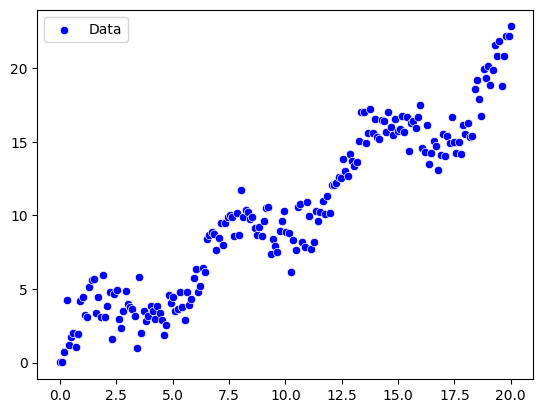

In [2]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [3]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [4]:
df = Simple1DRegressionDataset(X,y)


In [5]:
df[0]


(tensor([0.]), tensor([0.0066]))

In [6]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [7]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[9.2035]])]

In [ ]:
# construct the model using Linear block
in_features = 1
out_features = 1
model_2 = nn.Linear(in_features,out_features)


In [22]:
in_features = 1
out_features = 1

model_2 = nn.Sequential(
    nn.Linear(in_features , 128),
    nn.ReLU(),
    nn.Linear(128 , 64),
    nn.ReLU(),
    nn.Linear(64,16),
    nn.ReLU(),
    nn.Linear(16 , out_features),
)

In [16]:
loss_fn = nn.MSELoss()

In [50]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [43]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [53]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=100
                )


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.173966884613037
6.700821876525879
6.753880150616169
9.944235689938068
9.981342304497957
13.127495277673006
13.508572269231081
14.590432573109865
19.13170139864087
24.775506902486086
28.297157932072878
42.42322986200452
42.57714833691716
43.218276757746935
43.73863937333226
56.69088413193822
56.70029657892883
58.46439498476684
88.26069968752563
88.97627323679626
99.94163960032165
102.08075111918151
102.13436397351325
106.36427959240973
109.04392393864691
110.55298479832709
115.22428377903998
117.3290849570185
118.98453768528998
124.78503187932074
127.0608633402735
128.37254031933844
128.39031043462455
131.45191255025566
149.8048502486199
150.23405763320625
151.34753402881324
152.96833440475166
153.34074121527374
153.36022053286433
154.73796842619777
156.86130879446864
158.58691058680415
160.17109320685267
160.41653345152736
163.01706550642848
173.55991218611598
178.32672594115138
190.6288451962173
190.67937728390098
190.99793400987983
191.42975040897727
193.03151723369956
195.69165894

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.680525541305542
1.4053216576576233
8.55697351694107
25.598839819431305
26.344626247882843
26.46265921741724
32.39211402088404
37.43451104313135
37.75432101637125
39.88283387571573
42.530594028532505
42.79277301579714
42.81496298313141
51.226022362709045
51.47984105348587
53.00517827272415
53.02451682463288
55.391237501055
55.44336278736591
55.50454892590642
57.27904166653752
60.13563026860356
61.291418928653
68.29151811078191
68.65025882795453
76.27996234968305
76.36586010828614
80.20695174112916
81.07315969839692
81.93090176954865
84.73127437010407
84.99452412500978
85.1426149494946
87.68180285766721
87.72513797879219
91.36958435177803
92.75587001442909
99.66715827584267
100.61544969677925
101.61171290278435
102.40987512469292
103.28445228934288
103.83475533127785
108.58954182267189
108.66920173168182
109.67802011966705
112.46109759807587
120.33917224407196
120.42207016795874
122.39569511264563
122.42326208017766
127.56826539896429
127.81904586218297
131.62611373327672
136.590283235

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.182762145996094
9.064804017543793
9.902437806129456
12.374831795692444
42.13982546329498
42.14276425936259
44.185198951745406
45.9738337288145
51.49650828936137
56.82428376772441
57.06519452133216
57.52918512024917
57.544881489360705
59.04341461905278
60.67532375105657
61.34446778544225
61.40400632494129
62.46784778707661
62.48326605116017
63.47204815899022
68.96249472652562
68.9634105580626
72.40831989224534
74.3278144019423
74.3288179555675
76.87314807565417
78.40895759256091
80.63343416841235
80.80689758749213
86.39288372488227
86.93102700205054
87.2054962584516
94.11091417761054
97.63955802412238
97.64112891501281
98.12809057778213
104.0915405327687
114.85506935662124
115.50897033757064
115.72846181935165
139.84435232228134
149.77478273457382
150.55057330674026
153.8836364323506
154.246473717154
161.10943882411812
161.31635919457767
162.34564808255527
163.97706023103092
174.8438986862311
178.2709623897681
179.36736050492618
179.37138294114266
181.5642466439167
188.66232441796456


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.0036191940307617
14.04977035522461
19.35188388824463
19.353098286199383
21.156853450345807
36.336207164335065
45.68582512240391
46.13639060955029
47.47926144103985
50.547277970123105
51.908218426513486
52.41495959262829
55.81410638790112
55.81410646138653
56.29747044740185
56.48569051621422
71.18568937180504
71.31003721503481
80.49398191718325
88.80173071173891
89.52203949240908
90.28881146458849
90.28885061535226
93.4007213810383
119.50900728496896
119.56782349812971
119.58924067634331
119.68796616661535
122.13162308800207
122.25190314519392
123.7583502219914
124.05024444925772
124.65892410147177
124.95691358911978
125.09432563054548
125.10523189473139
125.43172104525553
125.43981794043617
126.33482161685066
132.06602612658577
135.80754057093696
136.03222829624252
136.83270663543777
136.8445484718232
139.3663055976777
158.5085003456025
158.53512225913988
158.6323547350167
176.2815837846993
176.76793736088263
191.2442595349549
191.4211347686051
192.59926444160925
194.20564156639563
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.0502313375473022
8.047510027885437
19.001055598258972
21.343696236610413
21.352726543322206
21.352750315381854
33.234023585035175
59.02335311384377
72.72972251386818
75.07420088262734
84.95616079778847
84.97577397996065
89.47321050339815
92.37568752938387
94.85879986458895
97.27095525437471
97.57556350999948
99.02919300371286
99.13514605635282
103.84593382948515
106.93035594099638
107.15167682343599
107.17700346098718
126.65648992644128
126.91986911283311
127.60640387521562
129.0449206112462
129.3426282583314
129.56240846501169
131.2450781045991
131.40308267162618
136.96406442211446
138.10894280956563
155.8625858454543
186.46807366894063
213.96144372509298
215.65888113067922
216.32576471851644
224.01915270374593
228.10054499195394
228.4334835140544
230.7736910908061
230.91986540244397
236.6138885347682
236.81576571152982
238.66231295750913
250.7107739178973
262.3976978986102
262.6312889783221
263.0379178254443
263.6868049828845
272.5517656533557
274.0725445477801
274.5354794888335
27

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.11942458152771
19.03494620323181
27.375234365463257
28.95388698577881
36.360586166381836
37.335681557655334
49.70208132266998
50.00203564763069
58.298628360033035
58.82152500748634
105.11413517594337
133.6085447371006
144.98561039566994
145.03067411854863
145.7210803218186
145.84666119888425
149.11176263168454
149.26037100329995
149.35188313946128
149.48079681023955
149.51946279406548
149.76058235764503
149.98749060928822
150.23998875916004
150.78769852221012
151.24866040050983
154.8929501324892
155.3716483861208
155.53563223779202
158.72129069268703
160.48726938664913
160.92764316499233
162.89915190637112
163.28580574691296
172.0234671086073
172.02913780556992
172.02952513704076
173.58104035863653
174.4860150576569
181.19174740323797
185.1321868658997
185.18408639216796
185.45093596959487
208.98979819798842
215.23611749196425
216.00209302688017
221.3148118951358
227.54865999007598
228.99977130675688
231.56316728377715
232.06070194626227
243.72848377609625
245.0054961242713
245.57843

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.1939780712127686
13.705782651901245
20.868946313858032
23.263940572738647
24.193257689476013
24.710450291633606
30.951786637306213
31.40438112616539
32.24905547499657
32.275464948266745
41.522365506738424
41.54187438450754
41.562470560893416
41.92043456993997
42.25778431259096
50.55903667770326
57.223267978057265
58.26255733333528
58.465061446651816
61.274717113003135
63.81141950748861
64.2757846917957
64.49414901994169
65.0957553293556
69.5473368074745
69.5537740807049
69.58365668868646
69.81117727374658
70.08497019624338
71.42975135659799
72.85482545709237
73.13433667039499
75.9496349892579
81.68960042810068
82.32806583261117
82.97813196992502
84.07896478986368
84.38324259733781
85.28198312735185
85.9680656096898
86.27320252871141
92.36704408144578
94.70623241877183
95.50381874060258
104.82600521063432
105.01122998213395
106.63282453035936
110.82346450304613
110.92351948982105
111.06822179025039
111.14011462545022
111.80148019408807
123.4725197753869
132.2671221694909
132.920552810

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.8013432025909424
5.979464769363403
12.259928941726685
12.798416495323181
12.834021110087633
17.095537204295397
19.66227700188756
19.662751329364255
21.644310367526487
21.97429169458337
23.208169949473813
25.840148461284116
27.56697787088342
31.64546908182092
32.40629513305612
32.406581003102474
36.118179160985164
36.30224830273073
38.016698781284504
40.208706799778156
42.15849715832155
42.28198943648022
42.739562135073356
45.87263594183605
45.95692021015566
50.70490891102236
51.91254002216738
52.5547899043886
52.80135046306532
56.29988728824537
56.74326847854536
57.563761759432964
58.05996539059561
58.169567014905624
60.896328594419174
74.793855335447
76.36045530054253
77.10488178941887
77.19340259197634
79.13455742958467
79.13493659312371
79.73980053479318
81.12777551228646
81.17958930844907
83.62003902310971
84.58629760856275
84.987296528765
87.5696300935233
89.46542782301549
91.37452418322209
96.1392455768073
98.06908041948918
98.08634972909931
117.86710000375751
118.0490619126940

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.17628152668476105
2.3538013249635696
2.7243752628564835
4.1514241844415665
4.415679916739464
4.475717946887016
5.195309743285179
5.942772313952446
6.3698452562093735
8.300596937537193
17.068668112158775
22.004130586981773
25.09930680692196
26.2919093221426
30.706133469939232
31.655484840273857
33.22936074435711
33.96515379846096
34.010864321142435
72.95917517319322
73.09049550071359
75.66874209418893
75.77596921101213
76.25388917699456
110.83831605687737
111.44378981366754
114.13006052747369
122.39103636518121
122.53675932064652
123.62759882584214
123.7204158641398
129.22079733386636
129.22087025179644
129.22117867256748
130.28278937126743
130.3580474400078
134.3771552586113
137.18044109578477
159.9893152260338
193.30114002461778
202.19746513600694
206.77582187886583
215.39030666585313
215.78375725384103
222.64147190685617
222.72238197858678
225.76527348096715
226.3146218949114
234.8519754105364
234.85927551268833
240.93772523879306
252.02649419783847
252.02652295435837
256.456720193

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.22454851865768433
0.8678711652755737
10.338362574577332
19.522549510002136
21.32470393180847
21.86802613735199
21.889911722391844
21.96480331197381
21.980285588651896
28.10509103909135
33.38566631451249
36.22296804562211
37.16860109940171
37.718724492937326
46.81860947981477
52.86358142271638
53.08696551993489
53.30738228932023
56.60676592960954
61.78174704685807
70.38598460331559
70.39509606547654
70.67253208346665
70.67999235307798
70.90809761499986
73.92258678888902
80.15956388926134
81.4719946286641
82.45516787981614
92.93542682146654
93.19827841734514
125.56392477964982
130.8642225167714
131.23778604483232
132.91804849123582
137.00935327028856
140.85302840685472
141.41058223461732
141.71251805638894
145.11008604383096
147.12649710988626
149.69792278623208
151.40415104245767
152.79845651006326
152.88502653455362
162.44248922681436
165.4289995036088
166.46284087514505
170.6506369910203
175.91033728932962
181.0226057372056
181.46568979835138
181.63307919120416
183.35648657893762
18

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.017790207639336586
7.139409909024835
11.503772148862481
14.132347950711846
14.194350173696876
14.757333805784583
20.280301621183753
21.130392542108893
23.650883665308356
23.96198653243482
24.344736149534583
25.66721003316343
27.24826126359403
27.26069133915007
31.607946092262864
33.33903151191771
46.999666506424546
47.31074463762343
47.62738856114447
66.03425463475287
66.39663451351225
66.43079195357859
68.3891624007374
78.59738002158701
79.3687037024647
90.54561791755259
90.69127134419978
90.99344644881785
91.17956254817545
97.69687221385539
97.82153654284775
99.55833959765732
100.40965670533478
100.6199068594724
108.95303006656468
109.37689937837422
110.30601652152836
119.78008325584233
132.8076921273023
141.61942155845463
144.8977640438825
147.01259692199528
151.31586249358952
157.09957869537175
161.6943991947919
161.70967686362565
162.7483645696193
163.06061744876206
163.4444558043033
163.46051508001983
164.43969338946044
164.79367103986442
168.86358824186027
169.7764051835984
17

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.1702656745910645
4.1754243723116815
4.232555554714054
12.772383855190128
12.896866427268833
19.49284659465775
25.306371317710727
27.278415666427463
27.509123177733272
29.383661360945553
29.40044307662174
31.470563411246985
31.49906357144937
32.47569509362802
34.23231800412759
35.025431951042265
38.16750272130594
40.342968543525785
46.433316787239164
49.268710216041654
50.45020850514993
61.60459884023294
61.60968736326322
62.77440014993772
62.808308818843216
86.82951281359419
92.64084837725386
97.94096586992964
109.53536532213911
111.65925596049055
113.39645121386275
114.39175705006346
118.12202099850401
120.26891712239012
122.50656012585387
122.70904042711481
123.42106636753306
126.1279545663856
137.24387654056773
163.68690594425425
166.01444419613108
166.80232694139704
167.5756851672195
168.95936026563868
168.95998959324788
170.50882248661947
183.99885754368734
188.42477087758016
188.52611749700736
188.5736160025699
192.23148891783785
193.66978607035708
194.75535390235018
194.757540

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.8495073318481445
5.150605916976929
5.8261637687683105
6.634395956993103
12.55967128276825
21.463433146476746
21.971393287181854
23.021715939044952
36.14300233125687
36.16184171102941
41.29331906698644
45.71039708517492
46.81060501001775
50.344643315300345
51.50618060491979
52.646286925300956
53.17638953588903
53.20045763626695
53.51213151589036
53.7819146849215
54.30723539367318
54.406172547489405
56.05499604716897
57.81504598632455
62.76513925567269
69.15258661285043
73.02554098144174
73.03430663514882
77.33556662965566
77.59378292132169
78.77913429308683
79.43648620415479
79.46789308730513
92.76052042189986
93.07617395464331
93.08766899537295
93.19537992309779
96.54627652000636
98.39003081154078
101.3213107092306
102.20542455743998
102.35873862635344
103.27816560398787
103.89505382906646
105.35861619841307
105.4552210373804
105.7439985377714
112.16030026506633
115.44372297357768
115.48152483534068
116.59263158868998
117.67168010305613
118.04282797407359
118.27801656257361
118.45440

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.213878631591797
3.2235724786296487
3.757251844741404
8.886929617263377
9.12992222700268
9.511244759894907
18.874969468452036
30.013739571906626
30.144334808923304
30.214686409570277
30.576537475921214
30.668721050955355
30.8089686492458
30.812184376409277
39.11572269885801
39.437954468419775
39.63293961971067
61.12525491206907
67.32423762767576
72.02208928554319
77.33129577129148
77.76907484023832
83.11602298705839
84.2448035904672
90.44972626655363
90.7009723612573
90.76250339834951
91.27952725975774
91.31869197427295
91.67563650547527
92.61935499846004
95.54621747671627
96.82415465055965
97.22131798206829
97.91851595579647
103.40589693724178
103.4278813933488
104.3575648998376
104.70815199962817
104.9859940444585
107.77961367717944
107.80580106540583
109.06578686996363
115.55161240859888
115.66340399696492
115.98489234759472
116.71162656857632
116.74797244160436
118.33410496800207
118.47399706928991
119.06254388182424
131.47089959471487
140.23546983092092
156.96431161253713
157.596

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8383422493934631
2.22697514295578
2.504950910806656
2.646321654319763
13.78688657283783
13.797855971381068
15.858111498877406
21.716247675940394
27.686523078009486
27.9219651799649
28.816995022818446
28.93120118789375
29.83054438047111
31.22478905133903
31.56723534874618
32.587911842390895
36.88638520054519
37.526763973757625
38.31561374478042
39.66519892029464
43.01217925362289
43.947310684248805
44.534275291487575
48.178408620879054
60.61041927151382
77.69613170437515
81.8803181629628
90.22163629345596
101.80121373943985
102.35690235905349
103.156957982108
103.176787590608
103.19019190780818
103.45065827481449
103.83339254371822
104.85017649643123
105.48840801231563
107.30516640655696
107.54612397961318
109.23986947350204
109.4317149054259
111.43941701762378
112.2008537184447
116.56604660861194
116.60296387784183
116.66443342529237
116.66581949929241
117.72435888985638
120.41553363541607
126.58478173951153
138.8540621731663
147.08404931763653
164.56626710633282
171.40595731476787
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.633366584777832
19.60738468170166
20.580274879932404
21.03516659140587
23.386413663625717
23.394171779509634
23.43310319399461
23.64195089554414
23.897872587200254
25.09420551871881
25.909245749469846
46.18627478694543
46.20657727820799
64.5568504105322
64.65333316428587
66.58498344523832
68.27342221839353
68.27537813037634
74.37522878497839
74.39700664393604
74.40271038841456
74.40271545393625
74.4874260891811
76.45635657204548
78.20368139637867
94.93711988819996
95.3489734698669
125.27472801698605
127.32092066301266
127.85996259941021
127.87172233319143
127.87300488521578
128.10823880304815
131.60487805475714
131.66037170757772
133.1035590635729
133.40753601660253
133.50669707526686
146.86228312720777
165.4411481784773
166.03919293155195
168.77832986583235
169.07243387569906
176.09159128536703
181.99895899166586
182.40524096955778
183.79477246274473
205.3311017321539
240.90520604123594
243.9897955225897
257.1487701701117
260.7156930731726
264.6014202403021
264.89881603588583
264.92

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

25.039106369018555
33.36674690246582
33.6647270321846
36.366420805454254
38.7372482419014
38.80175343900919
63.241969503462315
63.399256341159344
63.42915906570852
63.45008364878595
64.53624085150659
65.18047944270074
70.54713622294366
73.22881046496332
74.71860758028924
77.22744575701654
79.0402907487005
86.10159722529352
86.23775855265558
87.74230531416833
89.11623457632959
92.96045402251184
93.25376210175455
96.6201332565397
98.21969089470804
98.2218809244223
98.27984186680987
98.72154834540561
111.96188380988315
111.97199481865391
114.10262459656224
115.53684836765751
118.35866314312443
123.10650020977482
123.11242431262508
123.11509499629028
127.62391314585693
134.92108235438354
136.45420084078796
136.58728387136944
137.1798336126376
137.71952273626812
138.49883856554516
143.5617248036433
144.4076442338992
144.4806835942436
144.57734282989986
146.18647404690273
147.19948991318233
149.39808543701656
150.24825193663128
150.94733562250622
151.51815958996303
153.69403334637173
154.660

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.030618557706475258
1.9380332324653864
4.370157370343804
4.5395388547331095
5.136915618553758
5.224389122799039
7.255357073619962
8.288031267002225
8.323972461745143
29.56522917561233
31.737927673384547
31.7394401706988
32.109472809010185
35.12241083162371
36.511588154011406
37.269030687981285
48.79254638927523
59.04919636028353
59.582994160824455
63.28565019147936
70.46061128156725
73.44287103193346
78.87616246717516
79.05921137111727
87.29363119381014
115.97071897762362
119.21137535350863
119.21569128672127
119.2404396753991
120.33764924819116
121.04804494197015
121.26090412552003
124.95510893280152
126.37954788620118
127.03438388521317
130.08940827066544
130.10960592480842
130.82126893254463
131.78225554677192
133.7555589840049
134.30539520236198
134.81571187230293
135.58961363288108
138.36291666480247
142.0470234915847
142.33300958725158
142.68163438292686
148.1791491076583
157.6014885470504
159.4178252980346
159.6447371855611
159.78217609378044
161.02176602336112
161.762161211692

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.13211344182491302
25.591240867972374
25.59872380690649
38.63704625563696
50.64312020735815
52.017081894446164
52.35548047022894
54.171835221815854
57.058596171904355
57.558952011633664
57.67333873407915
60.25513919489458
61.04085471527651
66.35300614731386
66.41774574713781
72.53758160071447
82.08424488501623
82.20816751616076
82.30204734252766
86.17562851356342
89.45336136268452
94.1655972902663
96.84058675216511
97.26089224265888
97.55691194580868
99.56732010887936
100.75004196213558
100.90456564771011
101.1653034244664
101.16605259879725
101.56611599429743
103.71707477077143
104.00489060982363
105.52393524750369
105.76120108767645
119.81972426577704
120.2198543290724
155.9536647538771
156.030183326744
159.8567102070083
168.11698414041894
173.58714557840722
176.3381655330886
220.14012933924096
237.80311800196068
248.7512734050979
255.3517267818679
261.6260020847549
261.8936767394771
264.8764667327632
266.1364503915538
267.8214829976787
268.2190178449382
268.2224040723522
269.488170

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0010469276458024979
5.616752894595265
7.3762759286910295
8.014237197116017
9.222582729533315
10.680603178218007
12.289108427241445
28.539962919428945
33.04586139507592
35.149030121043324
39.217046650126576
42.08081737346947
42.884296448901296
52.11538699455559
53.45019796676934
54.00154999084771
55.81612888164818
55.81730673566926
59.69741509214509
60.872543194447644
61.9927419211017
62.117532217060216
65.94289132312406
76.0342723961221
79.03569337085355
80.22617479518522
82.29198619083036
85.20797344401944
85.21198759844992
85.58744554093573
85.61473161599133
93.21806556603406
93.23346968239639
93.36754730588291
100.73277786618564
100.79320020473097
100.9331586608896
103.2075431594858
114.82531907653902
115.94904890155885
116.02593355125282
117.62086527294014
118.64224140590522
118.65275507851038
119.22093993111048
122.27487927360926
123.04412007017527
123.76139682217035
140.45709269924555
140.5991734234849
140.6485867096344
141.11063571705017
141.7180400682846
142.60791661276016
15

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0006958825397305191
0.5606967193889432
4.487703917722683
5.427437363367062
5.427786942047533
9.035308952850755
9.576091523689684
18.291694398445543
20.05498790316051
23.900604243797716
24.839036460442003
30.007411475700792
31.473594065231737
34.237200375122484
34.83534019760555
35.23118242196506
36.08564021758502
37.57511439494556
38.79121782950824
46.38438084296649
46.47597496531671
49.01627557299798
70.51379220507806
70.5968000026769
70.80447806738084
78.24160899542039
79.02658923290437
85.03115876339143
85.44177301548189
91.98079832218355
92.31211962125963
94.53351225279039
95.08639915607637
95.29493339679902
97.36937411449617
97.45067351631587
99.10181968979305
99.11543973296648
123.41177686065203
123.92402197927004
123.95021399803227
129.48891982383793
135.29050263710087
136.45068976230687
136.81856775231427
136.84034455515211
141.95093310571974
144.25252068735426
146.93306267954176
148.17541111208266
150.61825693346327
156.51822555757826
156.76790868438547
156.82214394159382
15

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

10.377985000610352
18.172555923461914
22.077155828475952
22.085733567364514
23.170052801258862
24.36987951863557
34.647981439717114
41.589217458851635
43.92185071576387
47.000023637898266
50.0788977490738
51.026494656689465
52.960807357914746
53.19018427003175
66.61760011781007
73.45818821061403
73.46351052261889
73.49720458127558
74.07702491618693
86.23752067424357
88.0644532237202
88.54257098771632
91.26210276223719
99.89540258981287
100.54189972020686
101.43049565888941
101.46870971657336
101.87581397034228
108.9900145623833
110.19629002548754
111.35946215130389
115.90634811855853
115.97246084548533
116.30716092325747
117.75380797125399
118.26981199719012
118.27212253422476
119.71400240273215
119.74137605750002
120.28957857214846
132.85045541846193
133.08691041194834
133.11557034612633
134.32318476797082
137.5575814640615
137.6387824586127
138.15382237941958
140.30316181690432
140.80045031220652
140.9748232832644
151.8517172804568
152.10075167031027
153.30509749264456
175.8488024792

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.13156633079051971
16.951298996806145
17.02190187573433
22.986732751131058
25.117152243852615
25.20764297246933
54.029416501522064
61.35358327627182
62.57757240533829
62.591673424467444
63.32946710847318
63.77081983350217
64.90427212975919
66.26275282166898
66.31194683350623
74.48061081208289
74.57283739186823
75.09140805341303
75.11988249979913
75.14101751148701
78.62414868175983
79.5425262004137
81.1053456813097
81.4758518487215
82.59918792545795
87.87862594425678
93.26884181797504
102.5136309415102
102.77004979550838
103.55121211707592
103.74481783807278
104.15569125115871
104.15766423963942
104.20689580240287
104.26734932162799
106.12416930892505
107.59045119979419
111.53111406066455
114.99432869651355
115.87841745116748
131.29552312591113
131.3043673040811
131.32992211007513
132.24344852590002
132.3493717762176
133.41375230276026
135.1685479732696
136.69672034704126
137.2310975047294
137.23306080466136
137.33724212413654
137.35299996612594
137.3767439662479
140.8579301177524
141.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

20.97821617126465
21.42948865890503
21.64656074345112
27.60661990940571
28.574180141091347
28.632099073380232
29.07082800194621
40.936393301934004
41.5589753203094
49.73504934832454
51.059730749577284
52.12189183756709
60.67144952341914
62.202374797314405
62.31386176124215
62.69633409753442
62.77743674442172
63.1166424266994
63.148064225912094
70.51646289229393
70.88616260886192
75.14141258597374
75.18762411922216
84.14564432948828
84.18607657030225
84.22821119055152
85.21084835752845
88.58015277609229
89.24486216530204
91.62849458679557
93.21722003445029
99.57459374889731
104.55435058102012
104.6460362188518
109.49267156049609
109.67470182105899
110.20359314605594
115.13659084960818
115.18335839360952
116.18511005491018
126.14471813291311
126.16231304593384
126.22920389659703
138.63389177806675
143.8920437861234
143.97332401759923
144.49786873348057
144.87253354676068
152.7171923983842
154.39460538513958
154.6569648552686
155.1338371206075
155.68196655996144
159.49490191228688
172.760

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.4421515464782715
11.325160026550293
11.346353370696306
11.412139263004065
11.66828390583396
12.002643641084433
20.379436548799276
24.20509034022689
27.45302825793624
32.663667257875204
32.79281559213996
50.17750110849738
50.202663492411375
51.159822296351194
51.88621265813708
52.69440884515643
53.00136659666896
57.217777233570814
58.950934272259474
59.00341768935323
70.42323561385274
73.0291747637093
78.40068860724568
78.72682066634297
80.77639170363545
80.89930571243167
81.3920530192554
84.28740824386477
84.57698191329837
85.00549231097102
86.68298564478755
103.91550479456782
104.46453515812755
105.16094182059169
105.21294481307268
106.73667354136705
107.75150150805712
108.9670938923955
110.49373406916857
110.84694246202707
111.93196789175272
113.75718132406473
114.19685290008783
114.66988558322191
116.1612895205617
116.16163798570051
117.23266621827497
119.13115664719953
119.16148204318597
121.34738893024041
123.57588905803277
124.51550973168924
124.67075591496541
126.0840168517024

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5817452073097229
12.498115599155426
17.125968992710114
18.55548197031021
20.309987723827362
20.889975130558014
21.04997730255127
34.37881088256836
36.59932518005371
38.64705276489258
40.6514995098114
40.656852478627115
42.78016352141276
44.114207739476115
45.96426724875346
47.863751287106425
48.088979999069124
48.349770376924425
52.3512161471881
52.82086972380057
53.28899062657729
54.696706304792315
75.10789824509993
75.68723792815581
75.7805140116252
87.67447973275557
88.0651762583293
93.69550491357222
108.29213596368209
110.58736492181197
111.32906706118956
111.7208202877082
115.027490476612
117.39819083595648
119.92143688583747
126.03928671265021
126.41700075054541
126.54905856633559
126.7094842591323
127.58465550327674
127.6853758492507
127.68941954383627
134.3747561336495
134.78703794488683
136.2037430764176
137.65945622930303
138.1557189882733
141.82813877472654
143.1800188482739
147.31407541641966
147.43716318020597
147.43736832842114
147.4698453868914
148.84956559792045
149.4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8637710213661194
18.057736933231354
38.692428171634674
40.31825166940689
41.646097242832184
44.402086079120636
51.03111869096756
51.37320092320442
53.72958353161812
63.10298803448677
63.72030928730965
63.949622482061386
64.19884322583675
64.57146801054478
65.05620147287846
67.03722359240055
67.04632982052863
71.94883855618536
72.28785654343665
72.36369338817894
74.6277343351394
77.83147564716637
78.6467195469886
81.87966880388558
84.07800135202706
85.14015254564583
89.64365253038704
89.73177697695792
89.83958698250353
90.2250885758549
90.29721199162304
90.30848116241395
90.59186506830156
92.66232014261186
93.6210171636194
93.79050228558481
93.81101888231933
95.67573803476989
97.54741781763732
98.84181612543762
99.42829096131027
99.67542768828571
101.5049650799483
102.0145619045943
102.81518150679767
102.81918458128348
102.82613048283383
104.083424303215
116.48244259087369
117.5666287872009
117.63974110363051
118.77255789516494
119.19026569603011
120.24377660034224
120.97356847999617


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.857418060302734
7.066737174987793
15.50836181640625
18.43912410736084
18.523803658783436
22.332129664719105
23.025008864700794
24.412488289177418
24.987299390137196
28.104495234787464
30.6795851662755
30.705353239551187
31.971787909045815
32.20147299207747
32.88465237058699
36.20747541822493
36.20906543626916
37.84908497228753
39.57446849241387
39.60952039330732
40.02763755887281
40.48245851963293
41.44531600445043
41.751133489306085
42.30720751255285
56.0859665152384
63.2885016676737
63.819373535807244
63.84354027255904
64.09214509173762
64.3501523201121
64.4259728853358
69.73200268193614
70.31619704409968
77.70223296328913
77.90014991804492
78.97803959890734
82.99232707067858
89.98504290624987
90.20889241143595
92.85186106606852
94.01731151982676
96.00927752896678
96.272744572605
98.62940541550051
99.69360152527224
99.69361210096758
100.77019918192309
104.1618634485094
108.58376133669299
112.89795840013903
134.01089060533923
134.13709646690768
134.71677881706637
134.79023733962458


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.1822800636291504
1.5249722301959991
1.892460197210312
2.1921385526657104
2.2541339211165905
5.613394241780043
5.823870535939932
16.443184729665518
16.904562707990408
16.93602665513754
19.29712852090597
19.777911446988583
28.84127452224493
32.3964529260993
34.67082002013922
34.89213552325964
53.4880980476737
53.77373846620321
58.441348634660244
58.463288536295295
59.82399212382734
65.35857473872602
69.14746033214033
76.56198965571821
85.31398951075971
97.42532907985151
98.8947739508003
101.53895591758192
101.79394828341901
103.27331077121198
106.15511237643659
106.75404100678861
106.82594151608646
109.00284786336124
109.2342904638499
109.54987193457782
111.30371011607349
111.69687391631305
114.33649159781635
114.62430436722934
117.49214012734592
119.03212447278202
119.22908542864025
119.98765383474529
126.6974936556071
127.779153091833
130.2017249893397
130.75930909626186
132.80898169986904
138.2370770405978
140.01477508060634
148.4050538968295
149.7961180638522
151.10494141094387
151

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.7930729389190674
3.8656305074691772
26.71037232875824
37.534337401390076
38.086851358413696
38.55400052666664
39.02680364251137
39.11677114665508
39.162104934453964
44.65046343207359
45.98424991965294
47.77461466193199
49.04194614291191
59.64510604739189
71.09849712252617
72.46271273493767
72.82236194610596
74.37688302993774
74.86252456903458
79.0614486336708
83.37885910272598
84.0243980884552
84.31015881896019
84.75739789009094
90.21935439109802
91.00627917051315
91.91799712181091
94.07365369796753
95.83011162281036
96.76984137296677
96.83043683692813
100.61296356841922
109.16006172820926
109.77191026136279
110.66777397319674
115.9977886788547
116.28302658721805
116.3260865882039
117.11949653178453
123.60209579020739
123.83494997769594
127.64326859265566
128.19918901473284
130.64964873343706
130.6572605459951
132.015229949262
132.2170458524488
132.22319198492914
132.94599867705256
132.96889540273696
167.60528990346938
167.6707627074793
170.40466277766973
174.87571685481817
174.87683

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.1417214721441269
0.44301725924015045
3.4115510135889053
5.944552913308144
7.506948009133339
18.445569530129433
21.03818441927433
28.426903024315834
28.4639721699059
35.342506010085344
35.82830007746816
37.17648299410939
39.81987961009145
40.51971425488591
40.6488015986979
41.22113463655114
42.459459755569696
47.56025645509362
51.30530617013574
51.3334658741951
53.25337988138199
58.802569925785065
59.310281336307526
59.37885981053114
59.57294734567404
67.43712266534567
67.87035527080297
73.63191904872656
74.32849767059088
74.94106592983007
81.64970745891333
82.28229679912329
82.53619044274092
82.54869847092777
85.81044392380863
85.8169390191324
86.75343491928652
86.75570090929978
86.9342302463483
99.83813992957585
105.14815942267887
109.12125770072453
109.1535751230549
109.2448338798713
109.62650805036537
113.13373022596352
117.02533798734657
136.24331169645302
136.5684734217357
170.58664663950913
170.63501235540025
173.13935634191148
178.09704181249253
178.45943146641366
179.05101847

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.197089433670044
9.630597352981567
23.293129205703735
34.166576623916626
40.74301600456238
44.53643798828125
44.57801255956292
45.16379705443978
45.43398332968354
45.76416188850999
46.49941677227616
52.84157365933061
58.02246183529496
59.692109767347574
60.70176703110337
60.82297529652715
74.22728743031621
79.58898796513677
81.5798962302506
81.8896972425282
84.77016179636121
94.14166276529431
94.78199802711606
97.66284452751279
101.620037663728
102.52228723838925
102.76212166622281
102.86745848879218
102.99064229801297
103.41197844222188
105.56903691962361
105.6432121284306
107.18434708192945
107.60052277520299
107.98941995576024
108.69525732472539
110.78998412564397
110.94766986742616
112.6212773360312
112.92204177752137
112.94739877805114
113.05754381045699
115.39170676097274
116.51556342467666
116.87111109122634
117.81166749820113
126.01080613955855
129.61851292476058
139.4436157308519
154.24026661738753
154.38425965234637
157.48052115365863
157.70062450692058
162.12844232842326
17

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.14639613032341003
1.3767598569393158
1.6841609477996826
5.344518423080444
6.646111726760864
6.667838739231229
6.786975817754865
7.147455947473645
7.210554013028741
7.6099146995693445
7.7161255571991205
9.856252739205956
10.820412585511804
12.08484692312777
13.061599561944604
17.714704344049096
19.175660440698266
33.91986305452883
35.61356253363192
42.240036914125085
43.96833414770663
46.82025356031954
47.64224804379046
48.09696803428233
50.68653402663767
53.02681169845164
53.220838317647576
53.91770506836474
58.762148866429925
59.62267226912081
59.62604607688263
60.003115073312074
67.47177209006622
84.9506405745633
88.23270691977814
90.18870784388855
90.2204137374647
124.09682899015024
125.1096183587797
125.23681867914274
131.36856020288542
131.99508995609358
131.9980249532964
132.3956861027982
133.85963161080144
134.49486179440282
134.7068348804023
138.46568736224435
161.78414973407052
162.1671042421367
162.5443173327949
164.06379338889383
166.9945215859916
167.18832793622278
167.42

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.24249079823493958
1.7137297689914703
1.7769529446959496
1.9703232124447823
1.9952304363250732
5.5721025466918945
5.65367042273283
5.845174320042133
9.492905385792255
11.1581606939435
11.615990169346333
11.639937987551093
23.02245389483869
23.922143092378974
27.86950289271772
53.86432444117963
54.06467906199396
55.07110515795648
56.60360256396234
57.57862356863916
61.306816374883056
61.35508691705763
62.38212656415999
79.33478807844222
79.33480876991598
81.74126357147543
95.63171595642416
95.6678930290982
97.50906214797942
97.54372589225022
105.97270099753587
105.9945355405107
107.24319968121199
111.53959736721663
115.01235613720564
117.5016315926805
117.9711330582395
118.33363321917204
118.58946612970976
118.63870827229766
118.7692456183031
119.60272424789218
123.47741764159946
124.7007568416193
124.71855862559823
142.17551358165292
162.33482296885995
163.04690440120248
166.83476741733102
166.93733146907834
167.72480794908552
171.00347492219953
180.55928680421857
182.95182868959455
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.720751166343689
5.611905932426453
8.004598498344421
8.426261574029922
12.563025623559952
23.19127383828163
23.215809347108006
25.19252777285874
44.510368349030614
49.32491779513657
49.396852316334844
67.1005151886493
67.31140777654946
69.02793118543923
69.33367422409356
77.83266142196953
78.36465886421502
84.3598480541259
84.4986870456487
84.50234053679742
86.31281087943353
92.48005483695306
92.70309356995858
102.82484440156259
103.15556130954064
107.14653740474023
107.32129308232106
125.24949666508473
125.29579752334394
149.94016283401288
149.94687882368453
150.3537935644854
168.43675941531546
173.8349136740435
173.844735262217
174.12365811807103
174.34333282453008
178.1617637251038
180.29778343182988
180.9744720433373
181.01272078347392
181.35675384593196
182.51276876521297
185.44323565554805
186.2365029056091
188.502897759201
196.94884826731868
198.79424490523525
202.45694746566005
202.47976229828782
202.54895714414306
203.84317973745055
204.48396727931686
206.00128230941482
206.1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.393176078796387
11.970240592956543
12.189053475856781
15.481861293315887
20.70920866727829
25.761885821819305
25.936474099755287
27.431334391236305
32.37992848455906
32.37999286494596
34.20992758117063
38.29976656279905
39.63634540877683
43.026773236611916
43.13284552834375
52.35209430001123
52.35517455350055
54.23452867280139
55.40538216839923
55.63820874403609
56.18423932503356
56.23488638635172
58.474991776900424
59.03474853272928
63.444469907241
65.93009112115396
69.25681445832743
79.83628413911356
79.86098124544515
82.68078567545308
82.85635759394063
87.72840120355977
89.99003340761556
91.44808496992482
94.42888559858693
95.49088944952382
95.66057977538003
103.66098699431313
105.01580653052224
105.22280021469487
110.29527850906743
112.75049086372746
112.93001121740235
123.44365829687013
126.64254183034791
131.51890463094605
131.56330194781913
153.6732682258953
155.43616726707114
155.48338217745913
155.48879532088904
157.57977370490698
166.97045401801734
168.66562334766058
168.66

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.15871596336364746
0.3759209215641022
11.718419700860977
11.724799867719412
12.533213790506124
15.952585157006979
15.991206873208284
24.958534944802523
25.851123202592134
42.87800155952573
44.50088356807828
44.989565063267946
45.07204286381602
46.750965517014265
46.79404570534825
61.75320555642247
68.69022108986974
68.73424783721566
72.92174926772714
73.29610008373857
74.23177016153932
74.28992786258459
78.14913358539343
80.6858724579215
93.48045768588781
108.63382472842932
115.99949493259192
134.24698104709387
145.67805232852697
158.87361183017492
165.83780183643103
167.70687832683325
168.3085623010993
168.30881440322264
169.4443267552124
169.4668212054239
171.24688638429507
172.19727827291354
172.70383377055987
174.11134834270342
178.50502700786456
178.73322908263071
178.78254108558758
180.4321705592738
181.64852111469372
183.49322335849865
185.47250692974194
186.31806146036251
186.5405809773074
187.52910040746792
187.6455312637554
218.44372424166068
218.66806718389853
219.329199340

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

14.508161544799805
14.854748666286469
15.863292634487152
16.088167548179626
16.17874077707529
24.23629406839609
27.78076032549143
28.427056528627872
29.512967206537724
29.51297204289949
29.61971877608812
31.771418795924546
31.771605611796986
32.27307516431392
36.70887953137935
38.6170535693127
38.87132984494747
40.33514839505733
40.796649129148136
40.95228992497505
46.18060098683418
46.23243611400903
46.37869253104509
57.705465220864426
58.28539886420549
60.17541351264299
61.43031313365282
67.88490250056566
67.9090926023382
68.80195390900553
69.26799076518
70.71900683363856
71.04897170981349
71.09285809567155
72.04480465223969
73.17088361551941
75.66890807917298
78.99450774958314
83.67418094446839
84.25455911925019
84.26661900339604
85.40368465242864
94.20502094088079
94.26495899913789
94.31473290456415
94.33115458955945
99.31876302232922
99.88072813024701
101.43899190893353
101.67706974318207
113.92967994978608
115.31234105398835
120.90496047308625
121.4509409861821
127.39156140854539

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.14346662163734436
0.8468928039073944
0.9371425732970238
3.41632529348135
3.425905299372971
14.365473818965256
16.745587897486985
30.933291983790696
35.451910567469895
39.64063985366374
40.710625124163926
42.69539661426097
43.566502523608506
44.20484377164394
45.277308595366776
48.43891609925777
51.49062098283321
51.79220397491008
78.87543303985149
79.22903744596988
79.5658534290269
89.79460651893169
107.05839855689555
108.60943741817027
134.5874189855531
134.86604980845004
135.355462920852
153.85301960725337
156.6560627343133
160.02012027520686
160.32310558576137
169.9191768290475
170.0103267179802
170.02979006711394
170.73606040421873
173.84712364617735
176.52092792931944
197.2766976589337
199.11802854482085
200.73710527364165
202.69923164788634
204.39169766847044
237.90836408082396
238.01538331899792
239.8913188735023
239.9318596282974
247.43072809372097
247.65560165140778
250.66161432955414
250.88114133570343
251.17109671328217
254.03697386477143
254.3787204036489
257.256770492531

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.351785659790039
4.967061519622803
5.289396673440933
8.605792433023453
9.65661409497261
12.656956225633621
15.458685666322708
16.37566313147545
19.182619661092758
19.725592583417892
37.93268868327141
38.12666867673397
38.5068466514349
42.65485881268978
42.84182073175907
45.23821736872196
47.100205317139626
48.62994135916233
50.37755109369755
50.401311848312616
60.14145467057824
70.31753632798791
71.82555231824517
71.82555328687886
75.44476972898701
76.3015197404311
80.39297043165425
80.41007838776568
81.08065466216067
82.16591159632662
99.01583759119967
99.57242838671664
99.96502999594668
100.00983304163674
100.52235770603875
109.67394423863152
109.98199180146912
110.40491664787987
110.46657076111296
112.58729925384978
113.00597652426222
116.8905006312416
150.9683929347084
154.3775063418434
154.52189990511397
155.55899664392928
157.7401234768913
157.92499318352202
159.47154572239378
163.40609028568724
164.78944006195525
170.94464245071867
171.02020168682793
173.05082989117363
176.3247

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

14.040950775146484
31.384862899780273
31.388002077583224
31.448903581593186
32.35770626971498
37.61162539431825
37.80881751189008
38.67295903572813
39.166161662433296
40.07352758059278
41.471011525485665
41.67067158827558
41.67068246222607
41.68860545970074
43.56513276911846
47.53450241900555
54.68704214907757
55.714708121787226
55.72855997580609
55.74186191550962
57.335585927884495
58.863956427495395
61.8301851510214
64.40803811542264
65.1825860499548
65.76470193855039
65.79430847271851
66.94878618821076
67.04870667710475
67.06909452594391
70.4500361553537
70.81506167567841
70.83107385254971
72.42426929093472
74.68806752778164
79.7988611183273
91.37060889817349
101.53636512375942
104.30708918191067
104.98370561219326
105.13910101569763
105.84611188090912
108.10971366084686
108.40976383007637
108.70271666563622
119.12237246550194
120.20165272272698
126.44514580286614
127.74137635744682
128.27633281267754
128.28153222595847
128.4008405337254
128.57487436925567
129.30417588149703
130.649

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

15.702703475952148
15.99903717637062
33.45271721482277
33.76889497041702
36.5854349732399
36.59737445786595
36.752804446965456
37.158149648457766
37.391122568398714
45.77297281101346
61.48591874912381
61.618401784449816
64.49180008843541
66.89686300233006
67.02203259244561
67.62027356401086
67.65351923182607
68.17061509564519
73.52158011868596
74.25628312304616
74.33604696020484
74.90487214550376
75.18010934814811
75.26038048788905
75.29597367718816
75.29698396415915
78.16433764190879
93.36575937957969
94.37720931263175
94.38875676353928
95.56662143429276
95.93679679592606
97.11120499332901
97.46315945347305
106.74800194462296
120.85360802372452
126.80980766972061
133.60412539204117
136.89612497051712
137.46797467430588
137.47342492861208
138.1843387655681
150.36343212646898
151.64323719067033
155.58733113331255
155.93415184540208
156.46761103195604
161.43184443039354
163.57294817490038
165.046689110226
165.7133343986934
165.75281104666647
166.5242557845777
198.7112446151441
208.475343

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.91135311126709
4.7408130168914795
20.809841871261597
21.100193828344345
24.857504457235336
57.67108020186424
66.39569434523582
70.52379617094994
74.86142262816429
77.58652457594872
78.02455481886864
78.03278756514192
94.93406510725617
102.34877086058259
108.62315154448152
111.67847276106477
114.90114164724946
116.65950489416718
116.79631396010518
117.58696212247014
118.3708502240479
118.44799317792058
118.44981425371952
118.92778959241696
119.99501349893399
120.00452995044179
137.402410504641
141.79611301166005
145.6864135239739
145.6864892370213
146.00295208163152
146.2869678861607
149.26201523609052
150.03554458684812
155.70235605306516
157.15609593458066
161.8583969599713
166.79736418790708
168.33111329145322
168.36103745877335
185.47095414578507
185.6190457004268
186.690971340533
198.3037290233333
198.42892898201535
198.44874596923182
199.24776208728144
200.77211475699733
202.97502518027613
203.30019015401194
203.30725891563634
210.26194889518956
212.09542138550023
218.3322392222

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.901296854019165
1.376459687948227
2.6425481736660004
3.160403162240982
6.605064541101456
7.140854150056839
11.012870103120804
14.67028334736824
35.80074790120125
40.022080928087234
43.45936015248299
43.459921333997045
45.37223419925431
46.587246272771154
46.60799863381544
46.83435663027922
48.24371799273649
52.67249282641569
53.053370857669506
62.31032505078474
62.31082382018212
62.50314908439759
64.81600242073182
65.13041626627091
68.50832831079606
70.06285154039506
71.78664266283158
83.08372079546098
83.22635707969312
83.46943620557431
83.75547484273557
84.2332972359145
84.23804432956968
92.47806984989438
92.56463524012361
93.83473166136537
93.88808955310378
94.69299854396377
96.96784032939468
97.52856363414321
100.23315562366042
101.74460496066604
101.91615539847407
103.45564514456782
104.6171330815414
104.83098252175841
109.78877098916564
118.17254288552795
118.5952283894876
122.60372038243804
122.60599552921485
122.72633132420015
122.75270702212583
123.53186120360624
128.0813116

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.436610698699951
6.432807266712189
6.46423189714551
13.71706049516797
13.74074281565845
24.00523771159351
26.14178360812366
31.504506481811404
40.72524966113269
41.01647715084255
41.20493766479194
41.62869646959007
61.127229718491435
61.7919885199517
62.05867704562843
62.09054378606379
64.69425253011286
66.89487914182246
66.94927342422307
76.11285622604191
77.16643066890538
77.17453481722623
80.89482857752591
81.0647790627554
81.16625080723315
83.61335549969226
85.3658387484029
86.72804341930896
87.7528517069295
90.0464684786275
119.68140576500446
139.27518437523395
139.41730823833495
140.97104194480926
141.76899030525237
141.80688530672342
142.44778007734567
142.80115429032594
145.20821872819215
146.04140136111528
146.20033853221685
147.24698798824102
147.58113243151456
147.7517984258011
153.6841886388138
153.74506567139179
164.5475272955373
169.36619136948138
172.9152531446889
176.75811694283038
177.15697093028575
182.10826821345836
182.13774435501546
182.4105344293639
182.728220838

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.1338828802108765
3.8938597440719604
4.0313531011343
4.886916682124138
5.066841945052147
5.098741378635168
14.13461097702384
14.749401416629553
15.699933256953955
31.903565611690283
49.3734733723104
57.20845529064536
75.33158418163657
75.42628645524383
76.2673010788858
76.30991588160396
76.38173036649823
91.71175508573651
92.47084395959973
92.5470810495317
101.90450387820601
106.74100833758712
106.75374005921185
113.29499457962811
115.52265142090619
116.96736060269177
117.98325430043042
126.4911411870271
127.24454121477902
127.27383785136044
130.15570430643857
130.3392452020198
142.11699998565018
144.23964536376297
144.86472511477768
146.8338296432048
147.29019001312554
147.53545759804547
147.80467586405575
150.42754511721432
152.7162712085992
153.57253097184002
154.41295688040555
162.37212054617703
162.87805997021496
164.21265171654522
164.567761676386
167.58677460439503
168.62149860151112
168.80583062954247
169.54303053207695
171.07227829284966
174.79298952408135
176.49566939659417


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

13.082383155822754
13.34151178598404
13.388867300003767
14.097518187016249
16.06510005518794
22.801913123577833
27.60678706690669
34.70544896647334
36.05793724581599
38.807397704571486
38.91989725455642
46.60715597495437
47.579897578805685
49.61500209197402
53.70158999785781
57.23516934737563
70.40937035903335
82.74186032637954
87.37501471862197
97.83921950682998
97.86988764628768
100.22432070598006
107.34686165675521
107.7804675064981
109.27669000253081
112.75711273774505
112.86451683565974
112.86790679604746
113.68040912062861
114.3622774949763
116.17809628159739
118.55614493996836
119.30133895785548
119.73333962471224
120.04635770828463
120.07820470095612
121.05628860951401
125.74350536824204
126.83964432240464
126.84046466945438
128.59651120303897
129.01196371315746
135.27458702324657
139.17235480545787
139.4551775038126
149.4415180265787
149.8807862579706
153.51690991519717
164.70082696079044
167.96064003108768
168.05057292728452
172.2480431154254
172.86574804334668
176.2989247992

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0581824854016304
0.14254983514547348
0.21120762079954147
1.3617057725787163
15.112017624080181
43.93626879900694
43.93682357156649
43.98951737815514
70.08818452293053
71.43530015880242
73.05303268367425
80.51829700404778
82.5299413674511
87.42136173183098
87.77550734812394
88.09549637371674
88.0976714338176
89.71824113978073
93.78529398096725
96.38460199488327
96.64366339100525
102.6464452589862
102.77989713801071
107.42308656824753
108.61023072851822
109.72605113638565
109.83583912206814
112.18730553938076
119.41076382948086
120.85156223131344
120.85156292883954
120.91434027670226
141.60864188192687
153.25803210256896
157.39640976904235
159.8465738487085
159.84953374994262
159.89578793403967
160.63323519584998
163.47660587189063
164.09647587892874
165.10605649111136
165.70957867262229
167.1106309091793
167.60345519540175
171.76914561745986
171.78216126767262
177.56115868893727
180.58435586300953
185.93746951428517
186.03997921404704
186.60444646534785
186.75751622972354
186.80676800

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.633816719055176
3.8205068111419678
3.8944328874349594
4.570855185389519
5.542020544409752
7.3315610736608505
16.14643095433712
20.035232290625572
20.078096203505993
20.107749113813043
20.293985361233354
35.245185846462846
35.28022185899317
35.29411375615746
38.18805730435997
39.16233450267464
40.31004172656685
50.98768550250679
51.00792221073061
55.71278814319521
56.86126331333071
57.16446573380381
59.079988547600806
59.35053385142237
59.426420078612864
59.64500193390995
61.331864760257304
92.96807043347508
93.02222443465143
94.11993754748255
94.24402372632176
94.27075404953212
95.6225425703451
97.02851850818843
97.6929355962202
98.24929518532008
100.31350583862513
101.78243334125727
101.93516133259982
106.3599912924692
108.51440904568881
111.25449393223971
111.258580067195
111.41763130668551
111.51389186922461
142.28770320955664
144.11133354250342
144.1570772053674
147.08001960534602
153.01313937921077
182.24844325799495
182.30222273711115
184.69868875388056
184.75395573396236
187.1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.19610270857810974
0.21333037316799164
0.6723298579454422
7.329605534672737
7.924397900700569
10.086057141423225
13.169346287846565
19.482217267155647
19.515099812299013
21.726758051663637
22.414335060864687
22.492855791002512
26.64851212874055
29.08309245482087
29.32513638213277
30.576454360038042
40.62418194487691
41.28980602696538
48.0140854306519
48.208062905818224
57.61717488244176
59.03832747414708
62.0280687995255
62.08856523782015
67.41540563851595
67.59962824732065
68.32319281250238
69.93740353733301
70.54757181555033
70.56202493794262
83.35994039662182
87.13070951588452
87.57065303809941
99.7250834275037
101.47530634887516
103.7931268978864
104.47145535238087
104.60374026186764
108.63891796953976
108.9096746314317
108.93999139219522
109.07206029444933
110.43257469683886
113.74365467578173
114.45582623034716
115.19362402707338
116.80813527852297
117.62541211396456
117.66289221867919
118.01170003041625
120.68763029202819
121.42572956904769
122.26683163270354
122.41738637909293

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.8634326457977295
2.4808692932128906
5.356337785720825
8.853326559066772
8.855483199935406
10.502920772414654
11.370156850200146
11.511809404473752
11.592693838756531
12.420116755645722
13.730868789833039
14.006813916843385
40.194579038303345
45.76286784140393
45.81964079616591
46.2512892591767
47.63605047343299
53.676591645460576
53.69665588391945
53.76024179114029
63.25170640600845
64.00732402456924
64.94085703743622
67.8529392327182
68.88658283604309
86.90391109837219
136.29605053318664
136.3095384533517
139.59426650358364
139.65322702703997
139.6920636589639
139.88941673887894
144.07133297575638
159.33919052733108
161.6819410766475
162.10905016912147
162.2216872270219
168.33374968124554
169.1560796792619
169.16861294442788
169.18970824452117
169.19019929133356
173.53210107050836
173.60173410736024
173.85341156087816
175.53392196260393
175.5891609210521
175.58917003742317
182.92758041492561
183.7132519470797
183.7712371150301
183.786251120855
189.7712159684197
195.87102895288626
19

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.028279537335038185
3.144985431805253
4.715222114697099
5.358869904652238
5.510981330648065
6.619291195645928
7.633199462667108
7.638971871696413
8.12667120154947
11.394602662883699
11.566176808439195
12.605595028959215
19.127131856046617
24.477865136228502
37.77961055096239
38.4444692498073
39.18563518580049
45.227531529031694
48.351159430108964
48.850461102090776
49.74432203825563
49.92121653910726
59.22582965251058
60.38942556735128
60.55201630946249
61.02216737624258
61.50406717415899
61.533617123030126
61.56842804234475
61.83084711711854
61.8482615435496
66.50615806225687
71.34987563733011
84.91230315808207
102.38434714917094
102.45182514283806
134.98831653688103
198.5173387536779
216.51988697145134
224.89826393220574
226.51222872827202
226.59259689692408
234.9459332311526
235.07711673621088
235.09287194442004
235.2109799562022
241.92156078200787
242.18736107926816
243.98752148728818
245.38759966474026
246.22595455031842
246.50122179370373
258.5339509425685
258.86678712349385
261

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

10.96400260925293
18.169620037078857
18.64204815030098
18.916804254055023
20.51810222864151
24.07230430841446
29.97976928949356
31.259153068065643
33.60629862546921
33.70147340744734
36.685785464942455
36.716187968850136
36.872662112116814
36.90444038435817
37.460919838398695
42.89801738783717
49.204367619007826
51.473241072148085
51.97741089388728
64.5435911230743
65.31154940649867
66.28391478583217
69.8588211350143
69.98205767199397
78.49076757952571
81.63176332041621
88.27893434092402
95.32608924433589
95.39996554329991
95.57094765082002
97.56681633368134
97.95293161645532
104.33045694604516
105.40562364831567
107.6297375895083
107.95718732848763
108.06412468478084
111.57361541315913
111.5776643245481
111.58974788943306
122.5639586285688
123.82101295748726
126.08716653147712
126.72543458500877
133.43252782383934
134.38846658030525
178.64265130320564
180.96425054827705
183.70730732241645
184.89034126559272
184.9505126797594
185.1217954182066
185.12181862178113
185.26115942480828
185.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2543676793575287
0.8439553081989288
1.0700243711471558
6.56150758266449
6.864742577075958
10.614172041416168
10.618000717600808
19.70181438489817
23.17849132581614
23.888999553164467
24.611903937300667
32.91966417594813
37.429316790541634
38.559392722090706
39.21001413627528
44.101105483016
52.055752070387825
61.95695045753382
62.009712589671835
63.16382445185445
63.78894908516668
64.19654150097631
64.22394040762447
68.60056022345088
69.71874169050716
69.81369183002971
86.22602817951702
86.26050751074217
90.98406689031981
97.31491701467894
100.86923591955565
103.25024740560912
107.90774433477782
108.24859275086783
110.29620017274283
116.2959894107189
116.76956401928328
117.51590071781538
117.54222223511897
117.97169176093303
118.172320533311
121.1350719218608
121.3004032408353
134.09395850053988
134.25648640445434
134.37170437327586
141.13718727580272
141.15528202219866
144.27268672152422
152.4344289319124
152.64146220847033
152.6529398735147
153.39883668976836
155.56236537056975
179

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2985978424549103
0.3587728850543499
1.2136926762759686
6.539412509649992
12.201443683356047
12.393014770001173
13.997091393917799
14.230191390961409
14.32564352080226
28.234932880848646
29.588855605572462
30.509493689984083
31.326346438378096
31.517826955765486
32.833832662552595
32.862920409068465
33.07063323818147
34.60662013851106
39.73400003276765
41.37347132526338
43.04611081443727
43.507144218310714
45.512599712237716
62.735412364825606
73.83382201753557
79.49627090059221
85.55409885011613
85.62034896574914
86.73934594355524
86.74004989978857
93.87683588382788
93.88686764729209
100.32675374043174
101.43001735699363
101.75262168538757
111.99127200734802
114.08937362325378
127.79595473897643
130.3062363017816
131.2272413719911
132.6932830561418
132.75190920499153
133.16371039417572
135.4912777331192
143.2899279978592
161.3721805003006
161.46028086659499
166.4097914409358
167.29565653321333
172.6748140763957
173.45329830166884
173.7291733038146
178.50680983182974
181.1824311029631

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.16030234098434448
1.9249480366706848
21.819227516651154
22.417825937271118
40.90267777442932
41.13772138953209
41.396133720874786
42.76336294412613
42.77164873294532
50.60083374194801
50.727361334487796
52.721812857314944
55.06411017291248
66.2782052885741
82.3731645476073
83.55524755828083
84.29475755803287
85.29028411023319
89.60473055951297
91.0477987062186
91.04783301614589
91.06246900931365
91.22691584006316
91.8376376666165
94.54568982497221
95.75433981791502
95.77249452285832
96.03841185383862
97.40787052922315
99.96625304036206
107.56575608067578
110.54341769032544
112.10324442200726
114.87587892823285
114.95573814027375
115.13616069965428
117.76563319377965
118.91344460659093
119.39440610818929
119.4372610393948
120.70568137802547
120.8816435132212
132.38684294559425
158.34953520633644
159.541149595756
169.4506382737345
169.45504591102144
169.59920764202616
169.82993255788824
198.84906517202398
219.431865083523
227.17470346624395
227.88569407398245
228.02427093917868
233.372

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.795061111450195
6.225492388010025
10.417790323495865
10.579519674181938
14.303894445300102
18.329438135027885
18.395651437342167
35.58280048519373
36.906866170465946
37.88545475155115
38.82545814663172
40.025044061243534
40.0949674397707
58.8643708974123
59.49613370001316
61.718313828110695
76.58378376066685
77.09172488749027
80.80994321405888
81.22360028326511
83.30172385275364
86.04136051237583
86.3228053599596
86.75306178629398
88.30371107161045
90.24471379816532
97.57377006113529
99.07034958899021
100.85046185553074
100.8507447342854
109.86764098214917
109.9692677136045
115.7832153912168
115.82740196841769
115.91246658819728
121.45494610327296
124.60370451468043
125.03975448268466
125.1934939797502
125.71877111750655
127.10527004557662
130.1311172421556
133.0644940312486
155.342905896483
155.3480500828009
156.68553325044923
157.20111259329133
158.73015281069092
162.41407462465577
172.07451983797364
183.99577304231934
184.81923457491212
187.79902430879883
192.02854796755128
192.59

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.496884346008301
10.753355979919434
10.794979762285948
10.87033100053668
14.735624264925718
16.032750200480223
20.027361940592527
25.68296391889453
29.111272405833006
33.47702557966113
34.11348540708423
48.76014144346118
52.23033983632922
52.51317976042628
52.7413636110723
53.23844766244292
57.03402828797698
57.06811209395528
57.845662612468004
68.01872398331761
74.34026481583714
74.35112913604826
74.35440741106868
76.59833751246333
77.29037312790751
88.45451192185283
88.67571371421218
95.55049627646804
95.57461233623326
99.73390121944249
101.434920148924
102.31273599155247
104.38260121829808
115.80537744052708
118.68777175433934
121.75852175243199
122.34344674833119
127.71651937253773
128.99985267408192
130.5248271394521
130.55037737078965
134.87425422854722
135.70153665728867
136.0597665924579
136.6216030139476
143.24242258258164
143.84264201112092
147.42990344949067
149.11198121495545
149.5658096689731
151.27322155423462
151.28166328463703
151.5621476629749
152.27251277957112
152.3

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.012863557785749435
0.06953294202685356
7.896183084696531
9.589907478541136
9.78602771088481
11.850801508873701
13.653176229447126
13.742218885570765
16.046792183071375
18.221886549144983
18.62663570418954
18.6598257496953
18.704841304570436
22.586548019200563
31.559131789952517
35.218582559376955
48.071854043751955
48.928722370415926
49.17243031039834
49.49954206123948
51.59039479866624
53.16420489922166
53.79250228777528
69.33177936449647
70.46873319521546
70.4814946334809
70.68846922926605
71.83797949366271
71.89955596067011
72.65616915561259
77.98043892718852
78.99063096381724
79.60533396340907
80.17523674108088
81.30122462846339
81.53437618352473
82.48122499324381
82.72492327727377
84.58868923224509
86.68161668814719
87.94936254061759
88.78969683684409
90.92305722273886
90.95563791505992
98.505156500265
102.02427457086742
103.8137742113322
104.33590565435588
113.73679981939495
114.42992453090847
134.40643553249538
134.40764773800038
138.17721689655446
138.17729787623102
139.26745

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.007596053648740053
1.5191556592471898
1.5571013581939042
2.266691852826625
2.415107284206897
2.9671308142133057
4.19274214329198
6.336864028591663
13.203597579617053
13.755396876949817
14.33984497608617
17.14724401058629
19.26637438358739
19.26817986520473
19.799637348973192
20.101920695626177
20.11147271899972
20.257118501351215
20.7906891485909
21.3716400047997
23.79174260108266
26.19901708571706
26.520779111073352
27.44252202718053
27.883675851509906
28.25388369767461
28.383814626024105
39.93503265886102
40.74162977247033
40.78109069599304
42.196492989198305
42.34074959589634
42.70475340320263
45.97773480846081
54.01977372600231
54.982215051189996
55.783824805752374
55.78980751812924
66.61871453106869
70.10894389927853
73.35064431012142
76.10916062176693
96.29221649945248
96.91879459202755
105.1141738492297
106.02591641724575
106.08725386217702
106.7399492795812
118.6040564115392
120.8928690488683
121.4249958927976
121.52629515633453
122.38231048092712
125.5774885128485
125.837225

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.97306227684021
2.139932930469513
2.788628041744232
2.892857849597931
3.5189589262008667
4.500656604766846
6.583659410476685
6.584608688543085
17.277049675176386
20.26493205089355
21.864332809636835
22.77678574580932
32.651612177083734
33.409250571916346
33.43122399930144
37.46284927014494
37.466180944873486
39.38634600682417
39.69862234039465
47.67952119751135
47.68570904486114
47.7609889661544
50.812400594877545
51.11380083911354
51.29526677780086
52.01611468248302
52.60755643300945
52.60782794380793
55.29566506767878
56.97002128983149
58.703549307829235
58.705438235832844
59.268722454144154
59.48939954681555
63.09923135681311
63.77460109634558
63.99770131154219
65.73054888291517
67.58905341668287
69.51183202309767
73.39703276200453
82.99823858781019
84.19039025349775
89.95581879658857
90.40138208313147
90.68067576928297
95.59037473244825
98.93916633172194
98.97240248142043
99.19259689567843
99.22426985396305
134.44251249922672
134.51297493471066
152.7778999377624
154.24627967370907

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.013883749023079872
21.802677312865853
23.518403688445687
30.531619707122445
34.09388271905482
34.237137923017144
35.541817555204034
36.03891236521304
36.66881484724581
36.768181877210736
37.55717225559056
40.283316569402814
40.31372564099729
41.71454303525388
42.87646477483213
45.963554790243506
46.01019434817135
47.824184941127896
47.82498577982187
47.82504875614541
49.6516359563102
52.4633510823478
52.59002661361592
72.94231962814229
76.39392995490925
77.39169579400914
79.376435097598
79.3850935784285
80.18605793389725
81.21988380822586
81.75668222579407
81.94711194309639
83.35500417026924
85.21433565887855
85.49128163728165
86.28908432397293
86.87372631701874
86.87416971969651
87.52253456163453
87.5281573876855
89.61594859213801
89.76812102348777
98.11853053123923
101.03798510582419
105.53455616981955
114.44490983040305
130.64246155769797
132.74702479393454
133.38552602083655
135.03737564833136
137.63554759771796
146.70236774237128
146.75921070651384
147.72625321225496
151.3949410

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.054683368653059006
0.5144908539950848
1.2114392034709454
1.5509210042655468
1.8718828968703747
7.0244211964309216
7.785170715302229
7.796683349646628
7.850404457189143
7.906019941903651
8.107488543726504
8.251874686218798
8.486431003548205
10.431834698654711
16.089106083847582
20.089197636581957
20.162819222547114
20.652590678073466
24.71937267575413
24.774489098228514
25.00135884527117
25.355528303422034
25.522620120085776
44.21420566085726
55.91024772170931
72.29758063796908
72.81197122577578
84.93379358295351
88.36850027088076
90.76929096225649
91.8906184816733
102.53975788597018
103.85809926036745
103.89449432957917
106.90574411023408
108.83335784543306
111.44460180867463
115.37479499448091
117.3755195485428
117.52081323135644
118.29617715347558
124.32899070251733
124.74721763003618
125.84106132853776
133.88410541880876
133.88412262080965
134.3162699746972
142.28913126467523
151.03460894106684
154.8698714780694
159.23763309000788
159.31777148275432
160.63110153703747
164.38112847

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.194600448012352
0.6940204054117203
0.9948120564222336
6.9888606518507
14.555672690272331
16.232520028948784
16.232771616487298
20.575031023530755
20.93683848908404
21.202453207282815
24.703607391624246
26.388661097793374
27.05801851680735
27.47147564223269
37.450693171529565
37.463996980397496
38.18819609662751
38.498664949147496
39.40654150029877
40.42812970658997
46.11863044282654
46.93491098663071
47.48063788196305
48.14481714746216
57.67188910028199
60.57945374032715
63.147982630936895
64.30307212850312
67.08221498510102
67.24985027691582
76.44970322033623
77.21556687733391
77.24335612735013
79.8590277620242
82.43406571826199
85.23162378749112
86.57042636355618
86.6305377893732
94.43405179312686
96.31762139132479
99.70284287264803
101.34925059607485
113.40455893805483
113.65197261801222
115.47035607328871
117.32809885969618
117.34194106335053
117.4060744541348
117.80393679911504
117.85352959210286
130.4104858833016
130.59464096004376
134.46530579501996
134.66564718360314
134.6751

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.7478904724121094
3.946558952331543
4.166382983326912
4.16734276531497
5.252089483721647
8.216687424166594
8.52472333429614
8.844048095925245
9.112098110897932
10.63621832249919
15.512738002522383
21.70084120152751
26.321432841999922
26.758728696091566
27.641847444756422
27.730352355225477
28.432039154751692
29.500919831974898
29.5011258450686
29.946670028322842
37.87423798715463
45.45791718637338
45.771346780413296
46.17027545248857
47.074201705807354
47.14206441765418
48.105808581167366
48.20526536827674
48.572274799400475
49.489291961246636
50.44107478385558
57.01337664847961
73.59579890494933
80.50033992057433
81.65293401008239
84.06135981803527
84.27225853031268
84.62345008080592
85.76661125844112
86.34962246840587
89.5885331434547
93.17028210585704
93.42772866314044
93.83797053521266
99.43014792626491
101.88879827683559
101.92047395085683
103.18802441930166
108.43158711766591
112.75069798802724
114.11775769566884
115.70321955060354
115.80364411597839
119.55976789718261
125.56872

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.0838778018951416
4.164827227592468
4.546697050333023
6.029053717851639
6.253882512450218
13.91216765344143
17.02446900308132
17.04168452695012
21.89404906705022
22.247347313910723
23.18146737292409
24.788465816527605
25.747342128306627
50.676077861338854
51.60132898762822
52.121440548449755
57.17079987004399
57.35498318448663
58.801997277885675
60.98867616429925
61.176783088594675
61.40841521695256
63.21354653313756
63.294161323457956
81.61873865500093
99.9545121230185
100.88576090708375
103.51169169321656
103.57668982073665
110.1814266256988
110.19056892767549
110.66015681996942
124.22162208333611
127.35311946645379
131.38644704595208
132.89606556668878
132.9078967673704
133.01553180348128
141.2317135585472
143.15213241707534
143.15829703072086
147.10867020348087
147.2648462788202
147.52270309487358
147.90191612998024
148.38202546397224
148.67170460382476
149.063919080887
150.27677287021652
150.45088687399402
151.21005341270939
151.92417517164722
152.73187586525455
153.8673211024142

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.3916771411895752
0.40639100037515163
0.7522287126630545
3.0433547254651785
7.775449013337493
8.74954411946237
8.898050671443343
8.905843475833535
9.952715376392007
10.084984684363008
17.210779095068574
17.718214655295014
18.014785135164857
18.071660390123725
18.07637910777703
19.750745105091482
22.76672654086724
26.053386735264212
26.755821036640555
31.377130317036062
31.471449109259993
32.448461862746626
32.728609474841505
32.835678631905466
33.107119286898524
43.738750184420496
44.127593541983515
45.02970727765933
45.2891078540124
46.41803842270747
47.92222374165431
48.070380637887865
53.782915542367846
53.98212097072974
54.24717567348853
54.24974714964628
55.031879119575024
55.54596673697233
63.071794621646404
68.0665193721652
69.41909968107939
71.92305433005095
72.46120738238096
72.91605889052153
73.02849615365267
73.5874769166112
73.85803116112947
73.99853370338678
74.8547643199563
88.39838824421167
110.64486918598413
127.15483508259058
154.73329959064722
158.89912018924952
163.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.84865403175354
3.9364914894104004
3.9497761111706495
4.014461761340499
4.097250437363982
9.825669741258025
14.985202765092254
16.418097471818328
16.78246126137674
18.118689512833953
18.640440618619323
18.72393669746816
18.83629114739597
22.14164693467319
24.712462736293674
31.035720659419894
39.16555197350681
54.03621466271579
68.25377066247165
68.70346469990909
72.74669475667179
72.83984374813735
80.28271579556167
82.69646096043289
84.61950278095901
84.69055629335344
84.75833257846534
85.78996035270393
87.21218296699226
87.22992105968297
87.47015871293843
88.32636989839375
88.39282046444714
88.39302737166872
90.94409472396364
91.38821602513781
91.3900116327568
91.50978882046184
91.93363578052958
91.93774181319168
92.68862503481796
97.10394352389267
97.11910988477757
99.4452049889951
99.71411039022496
105.0932922521024
110.93454553274205
111.08609360543778
117.16771811334183
117.16996756353183
119.8330458716373
119.89955889590783
120.6015564740519
121.33906596311135
122.8250940383295

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.66166353225708
12.992144584655762
16.396156549453735
16.514312744140625
16.54763801395893
17.222835317254066
17.893182054162025
21.318803563714027
21.525119200348854
21.925805047154427
25.608862593770027
26.023066952824593
26.442030146718025
27.28637845814228
48.19659574329853
48.28593845665455
50.24397321045399
59.81841321289539
60.17244051396847
62.08028517663479
62.1166449598968
63.837217789143324
65.13636634871364
66.91517589613795
67.41205690428615
67.83282993361354
68.45676110312343
69.96655068919063
69.97548789251596
72.4195861266926
73.348931257613
73.66001391876489
79.38707042206079
79.38715961116395
79.39561712096474
80.5524824793174
81.58596121619485
82.14736168931267
93.0609254176452
96.194340162976
99.28733437608025
99.44439814339421
100.11047826061986
100.27353193710587
101.33265616844437
106.46570422600053
107.07139768551133
107.4772661263778
120.43490009854577
120.61730366299889
121.41610031674645
121.4162207072659
123.47086624559597
125.35373632368282
139.39135686811

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.02289521135389805
3.5653790179640055
4.399023110046983
12.681809479370713
21.39775567688048
23.30778663791716
23.625851595774293
42.85570045746863
44.16193720139563
44.361473063007
44.839496383443475
47.73119021393359
48.25914705730975
49.72126532532275
49.796021396294236
53.76182168163359
56.42380612529814
59.885586911812425
60.38351180590689
68.57889869250357
73.54455592669547
73.85060911811888
75.00376229919493
75.08468579687178
75.08961738087237
76.68586219288409
76.72804566659033
76.73786177393049
77.12867277022451
83.27752368804067
84.45794825907797
86.72025447245687
86.78316474612802
86.97832428570837
87.32078593131155
90.21852391120046
95.0661796843633
111.18980830069631
111.22040934022516
111.88689113315195
112.879399782978
114.03523767646402
136.87421739753336
141.21592462714761
141.21630947571248
144.16891806107014
149.400869297795
151.22574000339955
152.47739462833852
153.9100907323882
154.09634837787598
159.53453120868653
160.0091511933133
174.38537666480988
175.58069584

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0006728682201355696
0.5037956747692078
6.125908425776288
6.542420408455655
9.585187217919156
9.589531862409785
27.420083009870723
32.648539983900264
33.10805293289013
35.8273520108778
42.505263769300655
43.61924740043469
44.819056355627254
50.09731134143658
50.35809197393246
64.98889794317074
66.92753961053677
67.65991475549527
67.85099256900139
71.31919611361809
71.95041669276543
71.9522113710409
74.16996382770594
74.24357803759631
74.56249119935092
123.81807591614779
130.28821971116122
133.45028998551425
135.4746499269968
139.4592266291147
141.08703519997653
141.14793273282703
144.89387937856372
145.80564423871692
151.14616843534168
151.2305568404263
151.39346037281211
152.08026544225868
158.6370562709635
163.77978650701698
166.05841724050697
176.9039067424601
177.0762963987654
177.96730727923568
177.9759743254399
194.83207822253462
196.9485368769383
197.03720073809382
197.44887166132685
198.4455860744929
198.85362916102167
199.02069835772272
199.46310405840632
200.09408711304422
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6939576268196106
10.186203300952911
27.111076653003693
38.02502852678299
46.09728270769119
51.76327687501907
52.25682246685028
53.15199130773544
66.24941104650497
67.5132047533989
67.57154354080558
71.54727705940604
73.10552653297782
82.99321993812919
83.66390326246619
85.43376591429114
85.73149463161826
85.73506434750743
86.29746135068126
96.0447548229713
96.81478877854533
130.1665534575004
130.2463260490913
164.33245809865184
166.3577817280311
168.44081195187755
168.96175463986583
171.33352788281627
172.53090198826976
174.95268734288402
183.89637955022044
184.0188144047279
185.2585694391746
185.48205316555686
192.6484435845632
195.58386981976219
196.66461897385307
198.0956283856649
198.09562877229473
198.4514847438695
203.8888092677953
204.59579450300953
204.59663873062527
204.8187981610099
211.16968593643105
211.36139980600274
211.6703743700782
220.89742610500252
221.75968388364709
231.97436264799035
232.82250264928734
237.27155498311913
237.89678553388512
237.9039418822067
238.70

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.03156070038676262
0.04160392936319113
0.05247715301811695
2.0247993785887957
2.478058787062764
3.448574336245656
3.7198950070887804
6.428227307274938
6.465127171948552
8.689508618786931
8.70326791703701
9.542238101363182
11.62679086625576
11.778710424900055
15.800674974918365
16.238508313894272
16.37104967236519
16.374518643599004
16.708331565838307
17.20133862970397
21.452589850407094
25.36630259035155
25.47492891130969
25.68047810671851
28.294857512693852
33.67339802859351
36.815479050856084
37.612900148611516
40.667762886267155
46.28873599646613
58.1613918649964
59.783289920073
61.87064720271155
61.88980706362054
63.73528333334252
70.37721343664452
70.6914326432161
72.46344392327592
72.67433870164678
74.11467933980748
74.34940658835694
74.99663393525407
75.66453032521531
76.15224428800866
84.5168826165609
92.08002777723595
95.51748915342614
103.95634050993249
106.43697996763512
106.49308354733512
106.5183743792586
106.53098843572661
109.22853134153411
110.7680400419049
111.2797126

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.3910818099975586
19.945387840270996
21.92382323741913
30.220888018608093
35.85803925991058
35.95904931426048
51.41432771086693
67.7147122323513
69.1981802880764
69.22572841495275
70.83759298175573
71.20060723274946
83.63681405037642
83.63805457623675
85.19838091405109
107.86809679539874
108.21013217838481
109.32525556953624
111.24901419552043
113.5744722452946
116.53475981624797
117.2298682895489
117.36648077936843
117.58004651637748
117.58339105686173
117.61654202407226
117.61718265840318
122.43651287385728
122.50973740348127
137.72365513572004
144.95512047538068
148.04109373816755
154.67790737876203
158.71325579413678
158.93471668788698
159.84714780875947
164.08256136009004
165.07000486680772
165.07046859903494
169.5599161927239
170.4412152711884
170.87133001728216
172.05804192466894
172.2189286146895
175.86914304835955
176.68768129689852
179.95073566777864
179.9679283016012
184.0937885158346
184.1277550086961
194.20340999221662
195.44003566360334
195.6401095018373
219.215621434210

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.895113468170166
16.707430362701416
21.760190963745117
21.77149600163102
28.243216697126627
31.08187097683549
31.660638812929392
32.470059756189585
32.47781959408894
32.4844024493359
32.667555005755275
33.509505660738796
34.266281039919704
34.32910785963759
35.44054744532332
36.209938862826675
37.00043270876631
37.06930907210335
39.114681081380695
58.32514746626839
64.0992601676844
64.34379694005474
71.29454395314679
72.47065386315808
72.62917061289772
74.4763969941996
74.47920864564367
75.4107284520287
75.49906548601575
78.1568892870564
78.17696406436153
79.2213454444427
81.78396107745357
81.82229024660774
82.87069470179267
87.46583229792304
87.51974411425181
89.55120201525278
89.91291712340899
111.80901812133379
112.02971671638079
115.9583179813344
117.42131744441576
117.82413224992342
118.20378030952998
119.78060378250666
122.28275074181147
126.4892465036828
126.5000564607326
135.33597011887468
139.50504799210466
140.34006233536638
141.22355933510698
141.39534527086653
141.49253834

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.602137565612793
1.3476951122283936
2.4532196521759033
10.495350122451782
11.837287187576294
11.890678238123655
11.896821305621415
22.875480935443193
22.96356035815552
30.10407663928345
37.796592966187745
38.03461775230244
38.16789968358353
39.591415718663484
40.96879620896652
40.979074764531106
41.684348213952035
42.22570781735703
45.14188437489793
46.30699913529679
51.16289370087907
55.703297066967934
57.05642097024247
58.14726250199601
64.9331855061464
70.03452293900773
72.84246604470536
74.88261573342606
75.12294735340402
76.168179649394
77.15615775017068
80.04044343857095
82.75599147705361
84.44255711464211
86.00015904335305
86.1602754923515
90.1809282633476
90.28439098922536
90.50086543289945
96.79803702561185
108.65906951157376
110.89116594521329
115.23143264977261
115.41224348871037
120.96945679513738
121.21829133061692
121.92443000106141
122.37150197057053
122.95376448659226
123.08932893304154
126.2752436879091
133.18672506837174
133.19105843640864
133.21439071185887
157.6241

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2728886902332306
0.945022314786911
1.5722709000110626
5.866936236619949
8.218094140291214
8.585882782936096
17.067352890968323
19.945629477500916
20.22358563542366
25.607935935258865
25.610385122010484
31.431284131715074
32.88581758947112
34.099799694726244
34.100312188325915
35.579467132745776
36.56105901306728
36.80468574172119
40.252920061408076
43.154165655432735
43.4822465479956
44.23102971917251
44.52474907046417
49.38888958102325
49.39361554017523
55.76713877549628
56.39215516677359
65.51556539168814
65.93567922344664
66.39533409109572
82.24602588644484
87.38070329657057
90.33923205366591
92.33008107176283
100.27116641035536
101.90145811071852
103.61725684633711
103.70693452289561
105.77365333965281
106.05735309055308
106.06080063810805
109.16899188986281
111.16641291609267
121.64693125715712
121.66145422874251
140.68649771629134
141.28934737859527
141.37865004508058
155.50710234610597
158.10711464850465
158.10937805153662
158.50858325936133
158.84422580577666
159.849803012388

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

11.480901718139648
15.089831829071045
18.02476716041565
18.055509582161903
18.16612385213375
18.93762807548046
19.01824178546667
19.486173145473003
21.361045591533184
25.81350254267454
26.683471731841564
41.48266129940748
55.607891134917736
55.6081999912858
60.16254607588053
63.910620369017124
68.00381294637918
68.30269227176905
76.82282242923975
82.14241013675928
82.94859961420298
90.89734057337046
90.99350617825985
106.43259213864803
108.49588559567928
108.52663127705455
112.12949411198497
112.18309548124671
113.21887519583106
113.24246573261917
114.029192565009
115.499278543517
115.4994577224279
115.73413691473252
115.80109487277514
116.77300701838976
117.94678483706957
118.24477015239245
119.04344574910647
119.43686820370203
120.28692044121271
127.96933068138605
128.6603261957789
128.8669052998448
132.325939981165
148.83137973946577
148.85346073833352
150.07037837234384
154.03506762710458
156.3789165708149
156.8663604947651
157.08595832613355
157.37209337380773
157.40078956437355
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.122018814086914
8.887839078903198
8.891145068919286
13.306908447062597
14.549779969966039
14.589892029529437
14.594703072914854
14.625455109635368
17.297132699051872
17.691754220286384
25.47099101380445
25.481071742484346
25.487525486620143
28.41896536317654
28.5424281519372
28.842250333400443
29.052846954436973
29.115456433268264
29.443037153454497
29.98704952117987
36.44575828430243
40.02721136924811
40.12920325365849
40.65750246611424
41.46407561865635
41.472148888977244
41.58289007213898
48.57515958813019
49.65372864273377
49.89205176499672
49.892709248524625
50.30144711659523
50.34451088012429
52.23335823119851
55.60599311889382
55.60698372515617
55.642344117339235
59.38278138655005
63.88074004667578
66.71224558370886
79.14616549032507
79.38780888932524
88.8288403453189
94.8933459224063
95.01314687746344
95.89325517433463
96.10652066784678
96.37572039681254
96.44502817111788
96.88114424067317
100.10076136904536
102.86924333887873
103.52836205082713
105.24031044560252
114.6708772

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.6861841678619385
1.7539202347397804
1.8763257265090942
3.5263692140579224
3.5266525421175174
7.075845447543543
7.280062076810282
7.821749744180124
8.352714416745584
20.566491958859842
20.634420399728697
22.681569342676084
26.265497212472837
34.92056847101776
41.906645779672544
48.32938671595184
62.13086796290008
62.13174260768574
71.56509793910664
83.8403121343581
84.94190145644825
85.25478617462795
85.25655240297783
85.32044770300854
94.30463006079663
121.19545533240307
122.10119952738751
122.10211667255498
123.3983993215952
123.55813725129701
124.35673571960069
124.4074379822705
129.27446860284545
129.66520446748473
130.75682908506133
130.88956009061076
131.2577429881785
131.5966415873263
132.31750570447184
134.83883105427958
135.8229908219073
151.46933786780573
185.13597147376277
185.55575622827746
185.71484208316542
186.74030304164626
216.21374321193434
218.41091633052565
218.5529957881663
218.59063965291716
226.93139606923796
235.806468548486
235.99490735144354
242.0601458272431

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.9919083118438721
1.2390886694192886
8.400358811020851
9.163845732808113
9.937737420201302
9.9499855004251
10.320211913436651
21.27479984983802
23.44171979650855
26.462168004363775
27.71019282564521
30.29554333910346
30.468646463006735
30.956292506307364
56.12859284505248
56.92286777123809
57.16851453110576
57.35214185342193
57.89459204301238
58.64648711308837
60.587827917188406
60.94675001129508
61.497102584689856
69.59591564163566
73.36947616562247
74.76249810680747
79.52739116176963
79.52892461232841
79.68096983246505
79.68104129191488
80.12876903172582
85.13446151372045
86.9844205295667
87.09091600682586
88.26772722508758
88.37456621136516
88.6353857954964
89.7123232325539
89.80484879668802
89.89390440192074
91.65662999358028
93.58013005461544
95.83900089468807
100.49996442999691
100.7930339416489
117.88881526794285
118.62461732234806
118.71197465714067
120.00049022492021
124.26614717300981
126.48867992218584
128.39082125481218
129.67812041100115
130.44620237406343
130.59570398088

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

26.732412338256836
27.36803936958313
27.5173142850399
32.24814638495445
63.57835802435875
64.02328079938889
69.45727890729904
69.50618893653154
71.3341090157628
79.40133542567492
80.91973013430834
82.62141305953264
83.72168559581041
85.00564450770617
85.17948962002993
86.56737471371889
86.63569083064795
89.07029499858618
94.51901593059301
94.61073795706034
105.0938436165452
106.78777150064707
107.0146979317069
110.26449074596167
110.33452853560448
112.58511790633202
115.52135047316551
115.54229244217277
119.71055253967643
121.1510235927999
121.42522111162543
121.6447983942926
122.25189691409469
122.66069331392646
123.22859730944037
125.07688667997718
125.32702213153243
132.41007619723678
132.4232279304415
135.9345485214144
135.96881179697812
136.53611926920712
137.2814627159387
139.7220793236047
142.39772562868893
143.32960628159344
144.48048089630902
144.55672430433333
148.93977045454085
149.20047705806792
155.85925858654082
157.8516150061041
158.29957121051848
160.1951063219458
160.1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5729941129684448
1.6549729108810425
3.490045666694641
15.979898571968079
21.337483525276184
21.55935749411583
32.4788416326046
32.77475342154503
32.78899339493364
34.14707390125841
34.91351023968309
53.55332843121141
62.390807068906724
76.83166400250047
78.91505495365709
91.0464550619945
91.05428613442928
91.37587885279208
95.4382577361539
106.59853510279208
107.79194073099643
107.79194130148971
111.4952947064885
111.92437277879799
137.0180064305314
137.34495540108765
137.60959907021606
137.6199976229691
138.2124662423157
139.0189443254494
139.33096170664066
140.92295122385258
141.18580478668446
141.3141853386187
142.419419127109
147.95232470572228
151.67164547980065
151.68126000702614
151.90651226282353
156.2308888459229
160.51674127817387
161.21469992637867
161.8216201090836
161.85927581653232
163.90228962764377
165.9868121133768
167.25945162639255
167.60577773913974
170.8843758092844
171.28392395243281
171.39401929691667
172.5849904330098
173.16281985357637
176.1335327537381
177.4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.139060020446777
6.234885536134243
8.579699836671352
16.751690231263638
24.532255493104458
25.267976127564907
26.229848705232143
29.75636824220419
32.43809875100851
37.94726022332907
50.45783265680075
50.51499906182289
54.43013063073158
61.00471130013466
61.00582504924387
62.093839651905
63.873002893291414
66.19090212043375
66.38535619433969
67.63343907054514
69.8590893810615
71.28423178847879
71.48347977455705
82.74565247353166
85.94722632225603
92.99768570717424
93.02687088120729
93.0775595875457
94.48718809802085
95.63138043601066
95.73173837084323
97.6562034310773
99.25863055605441
99.26219308190048
99.30500567518175
99.38819656334817
99.9885209556669
100.03681371174753
100.6797275301069
101.85943887196481
103.37315902672708
106.3649435993284
106.70484838448465
106.75575805641711
107.20375896431506
107.24222862161696
109.28151332773268
109.2960185483098
120.2866191342473
120.98543298989534
122.1071170642972
122.65297568589449
125.89801991730928
126.19361013919115
147.1857366040349

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.3082190752029419
1.4080795049667358
4.900040984153748
8.227736830711365
8.419384315609932
9.924069121479988
10.222029969096184
13.456752583384514
27.704664036631584
28.534206733107567
29.173430010676384
30.63941566646099
30.675198387354612
30.689279708079994
32.16049555223435
34.16669515054673
35.88294616620988
38.97840896528214
39.35696924012154
40.12479549925774
40.21927397977561
40.91153889428824
42.40775447618216
43.76966529618949
48.340405519120395
56.24642091523856
57.49408560525626
81.10989027749747
98.7382109714672
99.85959702264518
100.72763126622885
100.79051080625504
101.28548315446824
101.31614887248725
101.5818744553253
105.37779339682311
105.40701401699334
116.47902501095086
145.287836198695
146.21358460653573
146.22698782011867
146.47068233415484
151.28675336763263
157.84096593782306
159.47352213785052
174.66720290109515
179.47286696359515
180.7883771173656
182.40064914152026
197.5951624624431
197.79660623893142
197.869140278548
199.4585732333362
205.50293577834964
205

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.4634008407592773
4.749098062515259
7.190450668334961
7.319888085126877
10.424451798200607
11.25607916712761
11.400762066245079
11.735864475369453
12.484044507145882
12.48498182016192
15.024303481157403
17.090621993120294
17.320827499206644
21.00134874897776
21.007044357422274
26.51610521710245
39.804239791992586
53.00052694714395
60.77065853512613
61.77981368935434
63.03954522049753
70.48466030991403
72.86214725411264
72.97758917993633
74.1992350119981
74.44038361794082
75.83607227093307
76.01004444545833
78.55868755764095
78.72038776165573
83.5347865272197
85.02219135052292
85.36185458785621
85.77290529495804
86.07532471901504
86.11877148336498
90.06965630239574
91.29437987989513
92.000958611432
92.1259683269891
93.85387443489162
95.4106100696954
95.77845539635746
96.21821170038311
96.72204231208889
101.60364126152126
101.69745111948578
102.10423049813835
113.30393371469108
131.35892066842644
137.5359354961547
168.30056295281975
168.5022610623273
179.51636495179264
183.4231566388043

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.756995916366577
2.908751964569092
3.2994461059570312
3.5626635551452637
6.616514682769775
6.867402374744415
7.889574825763702
7.890306787274312
8.360161022923421
26.501621441624593
35.16112347104354
35.17775160417659
35.421241853095125
36.7938121293555
45.842655513144564
57.80824408278568
58.083734515763354
58.33606595144374
58.86981183633907
59.033058885193896
69.49241423950298
69.55238498718245
70.87391044170363
71.58615042240126
72.37734653026564
80.48474933177931
81.1644820717047
82.11193974287016
84.65353400976164
86.76414473325713
88.05164726049406
88.40999479562743
89.86567170888884
91.82970555097563
92.42472191125853
93.97677047521574
96.21272475988371
120.68958671361906
120.72618948639138
122.68693088711007
124.23519884765847
124.52223014057381
124.77108871162636
124.98529729963047
125.55283681274159
136.70791570068104
156.75815144897206
157.5032709610532
160.40168414235814
160.4051012955024
160.72661777952453
167.71342607954284
186.71091600874206
187.15502398827812
191.9561

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2471945732831955
0.5753639787435532
0.8734065741300583
0.9093657620251179
1.9478318579494953
11.859031427651644
12.100039083510637
13.54751094058156
14.045157928019762
14.415209103375673
15.137277770787477
19.518966365605593
21.872179199010134
21.936102706938982
22.934463042765856
23.45943607762456
25.603798050433397
25.66808543726802
32.082701068371534
33.56624112650752
38.808074336498976
39.63955168053508
53.67166284844279
53.901878993958235
55.637939374893904
57.298636358231306
58.893482606858015
58.95491149276495
59.017968364059925
59.101350255310535
62.01164097338915
64.661973901093
64.70033201575279
66.96853908896446
67.60826477408409
69.6497400701046
70.25023368000984
71.47971966862679
72.71208730340004
72.77768901735544
73.09380672127008
74.36478457599878
74.72468889504671
74.92299944907427
79.1332965567708
82.89136130362749
87.38885457068682
117.43472058326006
118.12986881285906
118.68865276128054
118.70159632153809
131.60221106000245
132.41959613747895
133.70535487122834
13

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7922775745391846
0.7923996345780324
1.1084977881691884
1.2344066993973684
20.69633602068643
20.898203765013022
22.7059547053359
22.828143415012164
25.19134121850948
25.22025964871864
30.87000463620643
31.063603428163333
40.85443404034595
46.249922302522464
56.589601066865725
76.08450463131885
77.14411380604724
77.43197110012989
82.08679106549243
92.82714846447925
93.09233501271228
93.33888137058238
93.7035442860506
97.3910671742342
97.590070885577
101.84066168681602
102.0885338158987
104.77942698911647
106.39002591089229
111.77092438653926
113.07020228818874
113.11511794195394
114.31044128999929
114.85225812063436
115.44817963705282
116.26998731956701
116.67483962044935
116.7116741137288
118.55709924266557
118.58940398038249
123.04972016156535
123.50607570350985
124.7575366133533
126.41828390301089
136.78585668743472
137.53332587421755
139.80457302273135
152.341946565517
152.35741104741464
152.85532920618425
156.62941019792925
160.93480866213213
160.9379515812907
173.79248096208903
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7601885199546814
13.507892072200775
15.74075335264206
15.823620527982712
16.26501253247261
21.819590836763382
24.589375764131546
25.598268419504166
25.617223953828216
26.450199460610747
27.814359402284026
30.484448885545135
31.36072496138513
31.36241742828861
31.658782272133976
45.592076568398625
47.151134519372135
48.012329964432865
49.62277343729511
51.55865684011951
51.76618368783966
52.741370453033596
52.791072043124586
54.415722283069044
61.77146235341206
61.943373220507056
62.47233112389222
62.51436391333118
62.52519124234095
62.52695462619886
71.04389474308118
71.8083953014575
75.00368920480832
75.07332928990945
75.66656561708078
75.74730419879779
76.27260899310932
76.49653407698497
77.85299691325054
78.96235319739208
85.99643084174022
85.99690188287059
86.00402237527305
87.21243335359031
93.81831218354637
94.76621641271049
95.1669309293502
101.3668444310897
107.78768326394493
108.1477089082473
108.19680598430568
117.12890532665187
117.84271040611202
118.20203596405918
119.252

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.7864251136779785
1.823999810963869
5.966978956013918
18.600830007344484
20.528876710683107
20.73237081244588
30.35322042182088
33.26505537703633
33.9000974483788
35.625212866812944
44.34258099272847
47.41397114470601
49.398549158126116
52.94546898081899
62.69999321177602
65.15253289416432
75.56862385943532
75.65604377910495
75.67824397608638
76.38811765238643
77.373899679631
77.48932654038072
78.00439209118485
83.79750675335526
84.07581347599626
99.1364385522902
108.3426038660109
108.67660084739327
108.70624497160316
108.75797625631094
109.73622240871191
110.82723631709814
124.58281149715185
130.90161909908056
131.34733390063047
132.4176072999835
133.61409663408995
135.2474973127246
141.27684950083494
144.84820102900267
151.0922181531787
157.66614841669798
158.2102019712329
165.65906976908445
169.71352934092283
175.87449430674314
177.53773318976164
179.93886505812407
180.05559630692005
180.10784098133445
180.62767776474357
183.01118954643607
184.25893625244498
185.84400245174766
186.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4105146527290344
0.5198356211185455
0.5241292165592313
0.6350856767967343
6.768187616951764
8.367513631470501
10.649973844178021
15.415683721192181
20.126831983216107
20.800290738232434
34.47081152070314
43.9943749057129
43.99457684974186
43.999263488920406
44.38672008481808
44.44189338875003
44.59823307883926
44.85104570281692
45.821518992306665
48.162251805188134
52.92655644309707
53.240998898865655
62.964305554749444
63.31496379268356
63.452101637842134
63.825977047206834
63.933363487245515
64.0602237333078
64.94239995372482
65.69650790584274
77.27093264949508
78.8613090266008
79.31783208739944
81.20855150115676
81.4992974747438
81.51629254338332
83.22703084466048
101.4961214971263
104.4191909742076
105.28637066599913
105.28776125283912
113.32625727029517
117.69611982675269
117.72145951772109
119.24069465184584
123.31407178426161
123.48916170978919
123.63698620582
123.84799354756251
124.25118857109919
124.37089480692521
125.25244768196717
125.57777039939538
125.93226684862748
153.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.037068843841553
11.065886497497559
11.886241555213928
12.231558740139008
22.402138650417328
23.00881665945053
24.417482912540436
24.72461360692978
26.464025557041168
31.441641867160797
38.24669271707535
39.309134900569916
39.50719018280506
44.45522399246693
44.489466439932585
45.65302945300937
46.564830254763365
46.65078615769744
46.68201886303723
47.2767965067178
47.557864563539624
58.18860282190144
65.65933455713093
98.31463088281453
110.00136603601277
111.88780106790364
112.13278252072632
112.45996928401291
113.54419708438218
113.73127220757306
113.97390672750771
114.27472242899239
116.63446745462716
116.64205121202394
117.36316638393328
121.04047565860674
122.90044837398455
123.24853955907747
123.70924957795069
123.80967353237793
134.5864345873706
134.58742924849503
137.94788356940262
139.89382465998642
141.6607311598491
145.4993186823558
145.52765574189834
146.1510100576561
146.20966114732437
146.85504647227935
146.91181624564342
149.02070916327648
152.3533493343275
153.03305066

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.654596745967865
1.4791170358657837
9.60717260837555
17.391698002815247
17.53205633163452
28.219377994537354
31.98543381690979
43.4600784778595
43.557627171278
43.98887473344803
44.25678652524948
46.410474956035614
46.636227175593376
48.7507653683424
79.35399489104748
79.87746511399746
80.70616374909878
86.41531406342983
86.55531391501427
97.15340980887413
99.62703809142113
108.30712899565697
108.40979386121035
117.62382031232119
117.80364384502172
117.95805060118437
130.8133124038577
139.63368689268827
139.99695947021246
140.53474041074514
144.01570411771536
144.91389640420675
144.9834826439619
145.66201297938824
147.93857257068157
167.56296794116497
168.21906398236752
170.8424532264471
170.99344715476036
173.79093822836876
174.95813128352165
175.27790269255638
176.94659945368767
180.3319384753704
181.08809837698936
182.0028283894062
182.31203305721283
183.26789397001266
185.68832582235336
186.89713841676712
186.91527616418898
188.24773907102644
189.57708846963942
190.71419894136488


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.3706319332122803
8.926705121994019
10.98017930984497
21.260690212249756
22.522997856140137
26.94061517715454
27.035824090242386
27.089092798531055
27.414917208254337
27.58275755494833
28.617820344865322
33.183511815965176
33.710250459611416
39.58473547548056
39.60282611660659
40.02086189202964
40.10495246760547
41.46883727423847
41.70660994760692
42.43293528072536
52.52670053951442
69.2239242028445
77.42564634792507
77.64842685870826
78.41135725192726
79.49291750602424
82.36357876472175
84.94836279563606
86.50209411792457
86.57167734019458
94.00863422267139
99.56316341273487
99.7742198240012
100.15522263757885
100.23877025954425
101.55416334979236
112.09637202136219
112.69221074692905
114.34030265919864
114.35135526768863
114.39429463632405
116.65360821969807
125.09349622018635
128.465360539034
129.58960236795247
129.68976055271924
132.36885224469006
132.9079502094537
135.59733228571713
137.46960966475308
139.24074380286038
142.73183386214077
144.36595194227993
151.72718660719693
153

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.026341015473008156
0.42318048514425755
0.959373677149415
1.3412069622427225
15.82396643795073
16.012388894334435
17.419828483834863
18.831581423059106
21.240432092919946
24.214744875207543
30.155556032434106
30.262827964499593
30.263243231980596
30.86217627307633
31.281283143965993
31.287004511861596
31.31345081521431
33.18120813561836
34.10907000495354
42.217456044687424
50.36952990485588
50.48143631411949
50.95615092111984
51.58142897678772
51.80314327968517
51.82811662001768
52.52386173052946
58.447800004913006
58.83922174019972
59.27043139381567
59.52159478707472
67.31998422188917
70.05399944825331
71.80459585232893
72.3222837690846
77.4556427244679
87.74108412308851
87.88181285007158
90.47281102283159
91.58119467837969
93.51613084418932
94.87311915500322
96.8280184660689
97.63180957181612
102.28102622373262
102.28152409911854
104.00680676818592
105.9728612077306
107.81009725452168
110.91413000941975
110.91413128440036
113.4427989727701
125.95189797942294
129.38752424780978
137.3

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.19587978720664978
0.19749784015584737
0.45303564809728414
1.8393863990204409
2.879092867602594
4.852348740329035
17.06819957040716
19.45752399705816
19.616851295460947
23.406774724950083
28.561508382786997
32.124995674123056
32.12502760250209
32.17359277043579
34.35037967000244
37.92208811078308
39.64581092629669
46.430437410213926
46.59253361258743
48.268329525330046
49.11602076325653
55.94513996873138
64.5523825529599
64.552418068728
66.41286285289243
66.72781165011838
70.9262784279199
71.60507746108487
71.77397985824064
71.80380775847152
77.40780880369857
77.60376710512355
77.72975082018093
77.7323409002056
86.16123875787162
96.44804963281058
96.55111457964085
96.55521792357467
97.18046206419967
101.13281816428207
101.30874911134742
101.4030274916222
106.83728785996936
131.48116679673694
131.98458184485935
138.7101420331528
142.07606615310215
142.20867487972282
148.54650494640373
149.08135256355308
149.1137228104999
151.0987798068454
151.62258161043428
151.8614409062793
154.540003

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.479926109313965
7.584132432937622
10.121661186218262
14.217900276184082
14.265908427536488
14.65925494581461
18.685121931135654
38.864639677107334
40.71445921808481
41.13934991508722
41.674598671495914
42.44245997816324
43.033575512468815
43.31156838685274
44.26409191638231
47.25959438830614
50.49599976092577
51.77675873786211
52.819211192429066
54.11304969340563
56.97349185496569
57.16780128329992
59.702770851552486
59.98505314439535
60.33938493579626
61.39453997462988
63.394673727452755
63.87236066907644
71.31407257169485
71.92341943830252
75.30667611211538
89.950121127069
90.12315521389246
90.16859596222639
91.24059658497572
103.31329517811537
108.00147371739149
108.03911129385233
108.03911869159492
113.95184652438911
114.08076396516117
121.43357101014408
121.52495744010957
122.10209616205248
126.9209309436992
129.27426370164903
131.07576271078142
133.27968116781267
146.84287162801775
149.05754610082658
156.05715604803117
165.73235078832658
165.80189628085645
170.2341558404878
171

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.20033584535121918
13.626154288649559
13.670168530195951
14.342427264899015
17.869609605520964
17.93420784547925
53.859218526631594
54.56450640037656
79.67315279319882
79.76985947415233
79.77014115120983
79.77018946559838
81.58854085357598
81.70767200143746
97.43808066995553
97.43843334912526
97.60491757094132
102.38491825758683
109.98318009077775
112.17164258658158
118.88099078833329
123.81285648047196
123.82071525882202
124.34089280198532
124.38625908549147
137.1589126652034
140.40333343203383
140.62609436269122
140.82962461467105
141.0712206726821
141.67360392864066
142.75934962089377
143.90072099025565
148.1003874903472
150.10174480731803
163.29080597217398
167.3136808043273
188.4161149626525
188.4431718392225
188.9670485062452
202.6864841980787
202.74692200775462
204.87060617561656
204.88986808154004
208.68731814715284
210.22424954268354
210.38678106758016
210.38912118621374
210.52502362080122
210.5527285563221
212.69786157481576
214.81091132037545
214.94499173037912
215.08614275

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.1676606684923172
2.0043823271989822
2.8068837672472
3.796390488743782
14.877155259251595
18.037711337208748
18.32106451690197
43.28729681670666
44.60808126628399
44.757821545004845
45.526746675372124
46.29281733930111
55.24520419538021
57.02037785947323
59.35582898557186
60.40863810479641
60.55618700385094
71.95998033881187
72.17247888445854
74.12782892584801
74.13228443125263
75.39619770506397
75.45329709211364
75.47118869470432
76.49038198636845
76.50160072045401
87.14916465478018
88.54218826489523
88.69253733055666
94.41791679756716
100.22796966927126
100.43177277641371
126.66866738395765
127.53083134489134
127.60260382341221
127.72128116386011
136.00074683921412
136.74351542489603
137.558417909313
137.61287448974326
139.55955002876
140.2156043467112
140.40415244968608
142.39358073147014
143.81464796932414
151.3748610583134
151.64225035579875
153.85160880954936
153.87310072081164
154.2818992366083
156.13557186024264
156.7761612762697
160.79950102465227
163.26605328219011
163.31292

In [54]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

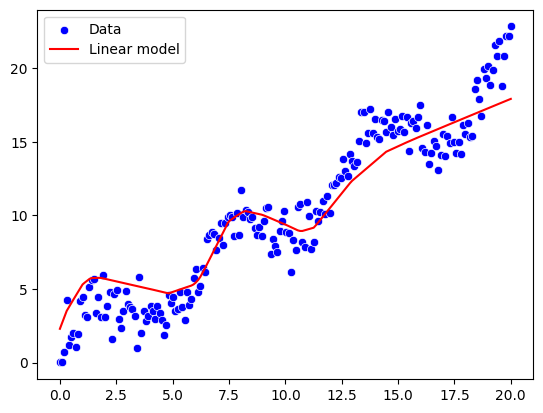

In [55]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
